<a href="https://colab.research.google.com/github/inetolko2b-svg/shine_light_on_dyes/blob/main/HOMO_LUMO_for_polyenes_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is the first code snippet that we need to run to begin our calculations. To execute the code, simply click the **Run** button and wait. This step should only take a short time. We start by installing the required packages and importing the necessary definitions. Packages are collections of Python files that contain useful pieces of code. Installing and importing them allows us to use many predefined functions without having to write the code from scratch. Note! the packages are not installed on your local computer. Instead,
Google Colab runs on a remote virtual machine. When you install a package using you are installing it on that virtual machine, not on your own computer. The installed packages will only exist for the duration of your session. Once the session ends (e.g., due to inactivity or manual reset), you'll need to reinstall them the next time you open the notebook. Once the code is executed the resutl will appear in the output window.

In [2]:
! pip install rdkit
! pip install pyscf
! pip install geometric

# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# import the package
from pyscf import gto, scf, dft, tddft
from pyscf.geomopt.geometric_solver import optimize
import scipy.constants as cst
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


Now we need to generate the desired molecule. The easiest way to do it is by using SMILES (Simplified Molecular Input Line Entry System). Every molecule can be represented as a sting of symbols, which will contain the infirmation rgarding the types of atoms in them molecule and the connectivity between them. But will not tell anythong regarding the three demensional properties. One can find SMILES of the desired molecule in e.g. PubChem (https://pubchem.ncbi.nlm.nih.gov/) or generate it in ChemDraw (Select the molecule, Edit -> Copy As -> SMILES). In the code below we convert the SMILES formate into MOLE formate (which can be used for further calculations) and we will generate XYZ file (this file will contain the information regarding the coordinates of the atoms; and can be oped in e.g. Avogadro for the visualization).

In [3]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# generate ethylene molecule
smiles = r"C=C"
mol = Chem.MolFromSmiles(smiles)
#Add hydrogen atoms to the molecule
mol = Chem.AddHs(mol)
#Generate a random 3D configuration
Chem.AllChem.EmbedMolecule(mol)
#Safe the molecule in XYZ file
Chem.MolToXYZFile(mol, "ethylene.xyz")


In [8]:
# generate butadiene molecule
smiles = r"C=CC=C"
mol = Chem.MolFromSmiles(smiles)
#Add hydrogen atoms to the molecule
mol = Chem.AddHs(mol)
#Generate a random 3D configuration
Chem.AllChem.EmbedMolecule(mol)
#Safe the molecule in XYZ file
Chem.MolToXYZFile(mol, "butadiene.xyz")

In [11]:
# generate octaene molecule
smiles = r"C=CC=CC=CC=CC"
mol = Chem.MolFromSmiles(smiles)
#Add hydrogen atoms to the molecule
mol = Chem.AddHs(mol)
#Generate a random 3D configuration
Chem.AllChem.EmbedMolecule(mol)
#Safe the molecule in XYZ file
Chem.MolToXYZFile(mol, "octaene.xyz")

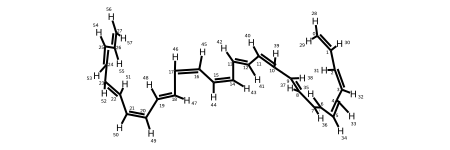

In [2]:
# generate tetrakaidecaene molecule
smiles = r"C=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=CC=C"
mol = Chem.MolFromSmiles(smiles)
#Add hydrogen atoms to the molecule
mol = Chem.AddHs(mol)
#Generate a random 3D configuration
Chem.AllChem.EmbedMolecule(mol)
#Safe the molecule in XYZ file
Chem.MolToXYZFile(mol, "tetrakaidecaene.xyz")
mol

The molecule which we have generated is in a random 3D configuration. The code below will generate an optimized structure of the molecule, adjusting the positions of the atoms. To do so we will need to convert our moleucle into anothe formate again. At the end of the code we safe a newly optimized molecule in XYZ formate again. You can download both of the XYZ files (before and after the optimization), open them in Avogadro and compare. The porcess will take some time.

In [4]:
from pyscf import gto, scf, dft, tddft

# create the pyscf molecule
mol = gto.Mole()
mol.atom="ethylene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)

#save the optimizaed molecule
mol_eq.tofile("opt_ethylene.xyz")

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-a087d6d2-6775-4093-9370-ee4b8c8be8d9.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1


/usr/local/lib/python3.11/dist-packages/pyscf/dft/libxc.py:511: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -0.507901  -0.352986   0.239323    0.000000  0.000000  0.000000
   C   0.497870   0.380491  -0.240705    0.000000  0.000000  0.000000
   H  -0.317622  -1.415163   0.361052    0.000000  0.000000  0.000000
   H  -1.472704   0.073120   0.499874    0.000000  0.000000  0.000000
   H   1.419826  -0.135383  -0.470431    0.000000  0.000000  0.000000
   H   0.380531   1.449921  -0.389113    0.000000  0.000000  0.000000
converged SCF energy = -77.619634712641
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0153705113    -0.0054996950     0.0063312116
1 C     0.0202192392     0.0069658956    -0.0082805784
2 H     0.0096198511     0.0102131141    -0.0051570720
3 H     0.0080091154     0.0011298571    -0.0029881881
4 H    -0.0153411794    -0.0044870208     0.0061365965
5 H    -0.0071370111    -0.0083225170     0.0039578458
--------------

Step    0 : Gradient = 1.612e-02/2.293e-02 (rms/max) Energy = -77.6196347126
Hessian Eigenvalues: 2.30000e-02 2.78828e-02 2.80809e-02 ... 3.52872e-01 3.58548e-01 5.85332e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -0.482906  -0.392429   0.237583    0.024995 -0.039443 -0.001740
   C   0.517082   0.356611  -0.243142    0.019212 -0.023880 -0.002437
   H  -0.464085  -1.473813   0.422400   -0.146463 -0.058650  0.061348
   H  -1.433878   0.093790   0.482668    0.038826  0.020670 -0.017206
   H   1.509558  -0.016491  -0.522686    0.089732  0.118892 -0.052255
   H   0.354244   1.432342  -0.376817   -0.026287 -0.017579  0.012296
converged SCF energy = -77.6213283262539
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0013848689    -0.0067486681     0.0016812605
1 C     0.0070999331     0.0045012892    -0.0032734261
2 H    -0.0062237666    -0.0001882853     0.0022007820
3 H     0.0024060741     0.0007866560    -0.0009763258
4 H     0.0007483090     0.0030592521    -0.0008023276
5 H    -0.0026460967    -0.0014091950

Step    1 : Displace = 1.001e-01/1.693e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 5.825e-03/9.021e-03 (rms/max) E (change) = -77.6213283263 (-1.694e-03) Quality = 0.352
Hessian Eigenvalues: 2.30000e-02 2.78828e-02 2.80809e-02 ... 3.55722e-01 3.78815e-01 6.09906e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -0.500369  -0.371342   0.239888   -0.017462  0.021087  0.002305
   C   0.501872   0.367571  -0.239735   -0.015210  0.010960  0.003407
   H  -0.400339  -1.454167   0.396668    0.063745  0.019646 -0.025731
   H  -1.473366   0.068865   0.500767   -0.039487 -0.024925  0.018099
   H   1.478898  -0.061277  -0.504025   -0.030660 -0.044786  0.018661
   H   0.393342   1.450322  -0.393544    0.039099  0.017980 -0.016727
converged SCF energy = -77.622403271069
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0012582010     0.0000937080     0.0004220945
1 C     0.0012978599    -0.0010272868    -0.0002705985
2 H     0.0005662492    -0.0011421036     0.0000067094
3 H    -0.0015276125     0.0009932762     0.0003577414
4 H     0.0017803420    -0.0001846615    -0.0005888284
5 H    -0.0008586512     0.0012672343 

Step    2 : Displace = 4.859e-02/7.142e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.610e-03/1.884e-03 (rms/max) E (change) = -77.6224032711 (-1.075e-03) Quality = 1.036
Hessian Eigenvalues: 2.30000e-02 2.78828e-02 2.80809e-02 ... 3.56614e-01 3.88870e-01 5.88497e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -0.496652  -0.371614   0.238601    0.003717 -0.000272 -0.001287
   C   0.497746   0.375297  -0.239622   -0.004126  0.007726  0.000113
   H  -0.397897  -1.452748   0.395487    0.002442  0.001418 -0.001181
   H  -1.469389   0.061581   0.500595    0.003977 -0.007284 -0.000172
   H   1.466332  -0.069130  -0.498184   -0.012565 -0.007853  0.005841
   H   0.399900   1.456576  -0.396853    0.006558  0.006254 -0.003309
converged SCF energy = -77.6223948096459
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0020428888    -0.0016716411    -0.0004147299
1 C    -0.0010591646     0.0026675734    -0.0001037209
2 H    -0.0007561852     0.0000090640     0.0002633061
3 H     0.0006750634     0.0000551348    -0.0002430323
4 H    -0.0010780673    -0.0012590976     0.0005964124
5 H     0.0001754478     0.0001988010

Step    3 : Displace = 9.284e-03/1.601e-02 (rms/max) Trust = 1.414e-01 (+) Grad = 1.813e-03/2.872e-03 (rms/max) E (change) = -77.6223948096 (+8.461e-06) Quality = -0.166
Hessian Eigenvalues: 2.30000e-02 2.78828e-02 2.80809e-02 ... 3.74184e-01 4.66263e-01 5.93981e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -0.499402  -0.370428   0.239337   -0.002750  0.001186  0.000736
   C   0.499197   0.370787  -0.239318    0.001451 -0.004510  0.000304
   H  -0.398072  -1.451263   0.395263   -0.000175  0.001486 -0.000225
   H  -1.472017   0.063269   0.501190   -0.002628  0.001688  0.000595
   H   1.471412  -0.063981  -0.500842    0.005080  0.005149 -0.002657
   H   0.398923   1.451579  -0.395606   -0.000978 -0.004997  0.001247
converged SCF energy = -77.6224319381052
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0000268599    -0.0000399044     0.0000172126
1 C     0.0000029898     0.0001526212    -0.0000288330
2 H    -0.0000029058     0.0003322720    -0.0000560571
3 H     0.0003538349    -0.0001418359    -0.0000963734
4 H    -0.0003877672     0.0000872107     0.0001179983
5 H     0.0000607104    -0.0003903794

Step    4 : Displace = 4.678e-03/7.731e-03 (rms/max) Trust = 4.642e-03 (-) Grad = 3.227e-04/4.146e-04 (rms/max) E (change) = -77.6224319381 (-3.713e-05) Quality = 0.920
Hessian Eigenvalues: 2.30000e-02 2.78828e-02 2.80809e-02 ... 3.78100e-01 4.87597e-01 5.80351e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -0.499444  -0.370729   0.239368   -0.000042 -0.000301  0.000031
   C   0.499563   0.370589  -0.239375    0.000366 -0.000197 -0.000056
   H  -0.398766  -1.452200   0.395600   -0.000694 -0.000937  0.000337
   H  -1.472532   0.063727   0.501220   -0.000516  0.000458  0.000031
   H   1.472781  -0.063504  -0.501335    0.001368  0.000477 -0.000494
   H   0.398440   1.452080  -0.395456   -0.000483  0.000501  0.000150
converged SCF energy = -77.6224326625345
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0000024945    -0.0000506040     0.0000090426
1 C     0.0000212152     0.0000079131    -0.0000097456
2 H     0.0000036287    -0.0001413121     0.0000254305
3 H    -0.0001498247     0.0000839779     0.0000389227
4 H     0.0001562342    -0.0000688034    -0.0000437539
5 H    -0.0000337490     0.0001688339

Step    5 : Displace = 9.164e-04/1.512e-03 (rms/max) Trust = 6.565e-03 (+) Grad = 1.390e-04/1.762e-04 (rms/max) E (change) = -77.6224326625 (-7.244e-07) Quality = 0.565
Hessian Eigenvalues: 2.30000e-02 2.78828e-02 2.80809e-02 ... 3.78100e-01 4.87597e-01 5.80351e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 13.531 seconds


'6\nXYZ from PySCF\nC          -0.49944402       -0.37072942        0.23936801\nC           0.49956274        0.37058949       -0.23937471\nH          -0.39876605       -1.45219956        0.39559970\nH          -1.47253236        0.06372741        0.50122041\nH           1.47278052       -0.06350448       -0.50133543\nH           0.39843969        1.45207982       -0.39545591'

In [9]:
# create the pyscf molecule
mol = gto.Mole()
mol.atom="butadiene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)

#save the optimizaed molecule
mol_eq.tofile("opt_butadiene.xyz")

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-a087d6d2-6775-4093-9370-ee4b8c8be8d9.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.515406   0.995104  -0.122997   -0.000000 -0.000000  0.000000
   C   0.579619   0.240171   0.428720    0.000000 -0.000000  0.000000
   C  -0.550932  -0.234887  -0.385106    0.000000  0.000000  0.000000
   C  -1.514064  -0.994204   0.122838    0.000000  0.000000  0.000000
   H   2.376210   1.374813   0.435671    0.000000  0.000000 -0.000000
   H   1.441639   1.259548  -1.176895    0.000000  0.000000  0.000000
   H   0.616070  -0.039339   1.453459    0.000000  0.000000  0.000000
   H  -0.627568   0.029481  -1.444845    0.000000 -0.000000  0.000000
   H  -2.347603  -1.344434  -0.477305    0.000000  0.000000  0.000000
   H  -1.488776  -1.286252   1.166460    0.000000  0.000000  0.000000
converged SCF energy = -154.071465142237
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0227786751    -0.01539

Step    0 : Gradient = 1.778e-02/3.123e-02 (rms/max) Energy = -154.0714651422
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 3.81551e-01 6.01058e-01 6.12193e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.590181   1.045744  -0.134185    0.074775  0.050640 -0.011188
   C   0.590674   0.274115   0.337454    0.011055  0.033944 -0.091266
   C  -0.598481  -0.268426  -0.373313   -0.047549 -0.033539  0.011793
   C  -1.574189  -1.039701   0.148024   -0.060125 -0.045497  0.025186
   H   2.417586   1.381647   0.501268    0.041376  0.006834  0.065597
   H   1.605829   1.365033  -1.182201    0.164190  0.105485 -0.005306
   H   0.628607  -0.013750   1.393649    0.012537  0.025589 -0.059810
   H  -0.686367  -0.009824  -1.437601   -0.058799 -0.039305  0.007244
   H  -2.416516  -1.394845  -0.454331   -0.068913 -0.050411  0.022974
   H  -1.557249  -1.339938   1.201412   -0.068473 -0.053686  0.034952
converged SCF energy = -154.074122481237
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0109176739     0.00437

Step    1 : Displace = 9.897e-02/1.953e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 9.464e-03/1.552e-02 (rms/max) E (change) = -154.0741224812 (-2.657e-03) Quality = 0.341
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.52726e-01 6.05673e-01 7.07838e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.551121   1.026431  -0.151743   -0.039060 -0.019313 -0.017558
   C   0.574711   0.251203   0.381001   -0.015962 -0.022911  0.043546
   C  -0.585687  -0.249315  -0.410645    0.012794  0.019111 -0.037332
   C  -1.544161  -1.022760   0.154182    0.030028  0.016941  0.006158
   H   2.381239   1.365342   0.479350   -0.036347 -0.016306 -0.021918
   H   1.560352   1.343457  -1.205764   -0.045477 -0.021576 -0.023562
   H   0.603993  -0.047840   1.456519   -0.024614 -0.034090  0.062870
   H  -0.625554   0.039694  -1.474913    0.060813  0.049518 -0.037312
   H  -2.394355  -1.384362  -0.443265    0.022161  0.010483  0.011066
   H  -1.521253  -1.321650   1.215602    0.035996  0.018288  0.014190
converged SCF energy = -154.074956433525
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0064294385     0.00722

Step    2 : Displace = 5.385e-02/8.735e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.009e-02/1.755e-02 (rms/max) E (change) = -154.0749564335 (-8.340e-04) Quality = 0.304
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.86468e-01 6.04818e-01 6.30348e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.546612   1.020048  -0.139523   -0.004510 -0.006383  0.012220
   C   0.588346   0.251994   0.407339    0.013634  0.000791  0.026338
   C  -0.573099  -0.252835  -0.371930    0.012588 -0.003521  0.038715
   C  -1.555540  -1.022520   0.128769   -0.011379  0.000240 -0.025414
   H   2.406661   1.397248   0.426326    0.025422  0.031906 -0.053025
   H   1.507982   1.307872  -1.197013   -0.052370 -0.035585  0.008750
   H   0.634013  -0.033100   1.470649    0.030020  0.014740  0.014130
   H  -0.600765   0.042567  -1.431554    0.024789  0.002873  0.043359
   H  -2.399711  -1.378799  -0.473802   -0.005356  0.005564 -0.030538
   H  -1.553985  -1.332205   1.180886   -0.032732 -0.010555 -0.034716
converged SCF energy = -154.07593923605
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0016865974    -0.001256

Step    3 : Displace = 4.393e-02/6.698e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 2.092e-03/3.897e-03 (rms/max) E (change) = -154.0759392360 (-9.828e-04) Quality = 0.760
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.65573e-01 6.06163e-01 6.17967e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.556830   1.025680  -0.136332    0.010218  0.005632  0.003191
   C   0.577422   0.257692   0.364837   -0.010924  0.005698 -0.042501
   C  -0.591074  -0.257111  -0.395900   -0.017976 -0.004276 -0.023970
   C  -1.547386  -1.023731   0.149905    0.008154 -0.001211  0.021136
   H   2.392251   1.371268   0.483713   -0.014410 -0.025979  0.057387
   H   1.561186   1.338637  -1.186660    0.053204  0.030765  0.010353
   H   0.613808  -0.031232   1.421016   -0.020205  0.001868 -0.049633
   H  -0.646733   0.021423  -1.458203   -0.045968 -0.021145 -0.026649
   H  -2.392650  -1.382614  -0.446365    0.007062 -0.003815  0.027437
   H  -1.523233  -1.319871   1.204343    0.030752  0.012334  0.023457
converged SCF energy = -154.075933291486
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0007140386    -0.00138

Step    4 : Displace = 4.495e-02/6.497e-02 (rms/max) Trust = 1.414e-01 (+) Grad = 2.746e-03/4.904e-03 (rms/max) E (change) = -154.0759332915 (+5.945e-06) Quality = -0.019
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.70988e-01 6.10985e-01 6.18127e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.552418   1.025253  -0.143980   -0.004412 -0.000426 -0.007647
   C   0.584178   0.256022   0.384950    0.006756 -0.001670  0.020113
   C  -0.582783  -0.255545  -0.383601    0.008291  0.001567  0.012299
   C  -1.553163  -1.024931   0.141274   -0.005777 -0.001200 -0.008631
   H   2.394591   1.379325   0.461940    0.002341  0.008057 -0.021773
   H   1.541659   1.329772  -1.197967   -0.019528 -0.008866 -0.011307
   H   0.626575  -0.030731   1.446537    0.012766  0.000501  0.025521
   H  -0.624217   0.031748  -1.444946    0.022516  0.010325  0.013256
   H  -2.397959  -1.382244  -0.459304   -0.005309  0.000370 -0.012939
   H  -1.540858  -1.328502   1.195370   -0.017626 -0.008631 -0.008973
converged SCF energy = -154.076101101657
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0001104755     0.00042

Step    5 : Displace = 2.064e-02/2.854e-02 (rms/max) Trust = 2.248e-02 (-) Grad = 6.396e-04/1.293e-03 (rms/max) E (change) = -154.0761011017 (-1.678e-04) Quality = 0.902
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.71415e-01 6.12278e-01 6.32997e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.551919   1.023268  -0.137759   -0.000499 -0.001986  0.006221
   C   0.581643   0.253624   0.387743   -0.002534 -0.002398  0.002793
   C  -0.582409  -0.254137  -0.387650    0.000374  0.001408 -0.004049
   C  -1.551225  -1.023614   0.140391    0.001938  0.001317 -0.000882
   H   2.401678   1.386970   0.451977    0.007086  0.007645 -0.009963
   H   1.533885   1.323506  -1.192639   -0.007774 -0.006265  0.005328
   H   0.620564  -0.035491   1.449649   -0.006011 -0.004760  0.003112
   H  -0.621552   0.034652  -1.448921    0.002665  0.002904 -0.003974
   H  -2.397391  -1.382604  -0.457594    0.000568 -0.000361  0.001710
   H  -1.536647  -1.325982   1.195061    0.004211  0.002520 -0.000309
converged SCF energy = -154.076091626836
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0005327017     0.00001

Step    6 : Displace = 7.418e-03/1.413e-02 (rms/max) Trust = 3.178e-02 (+) Grad = 8.895e-04/1.617e-03 (rms/max) E (change) = -154.0760916268 (+9.475e-06) Quality = -0.390
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.74487e-01 6.14891e-01 6.20230e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.551861   1.024141  -0.140723   -0.000059  0.000873 -0.002965
   C   0.582808   0.254890   0.385974    0.001165  0.001266 -0.001769
   C  -0.582693  -0.254966  -0.385474   -0.000284 -0.000829  0.002176
   C  -1.551802  -1.024231   0.141126   -0.000577 -0.000617  0.000735
   H   2.397966   1.383213   0.456878   -0.003712 -0.003757  0.004901
   H   1.537268   1.326429  -1.195109    0.003384  0.002923 -0.002470
   H   0.623610  -0.032894   1.447353    0.003046  0.002598 -0.002295
   H  -0.623241   0.032943  -1.446726   -0.001689 -0.001709  0.002195
   H  -2.397046  -1.382193  -0.458392    0.000345  0.000411 -0.000798
   H  -1.538272  -1.327148   1.195357   -0.001624 -0.001166  0.000296
converged SCF energy = -154.076111638533
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0000258771    -0.00009

Step    7 : Displace = 3.705e-03/7.271e-03 (rms/max) Trust = 3.709e-03 (-) Grad = 1.369e-04/2.743e-04 (rms/max) E (change) = -154.0761116385 (-2.001e-05) Quality = 0.991
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.79668e-01 6.16282e-01 6.21477e-01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.551923   1.024567  -0.141430    0.000062  0.000426 -0.000706
   C   0.582868   0.255203   0.385162    0.000060  0.000313 -0.000812
   C  -0.582937  -0.255132  -0.385546   -0.000244 -0.000166 -0.000072
   C  -1.551752  -1.024484   0.141490    0.000050 -0.000254  0.000363
   H   2.397053   1.382450   0.458245   -0.000913 -0.000763  0.001367
   H   1.538337   1.327512  -1.195615    0.001069  0.001083 -0.000506
   H   0.623963  -0.032443   1.446454    0.000353  0.000451 -0.000900
   H  -0.624201   0.032415  -1.446857   -0.000960 -0.000528 -0.000130
   H  -2.397240  -1.382831  -0.457407   -0.000194 -0.000638  0.000985
   H  -1.537559  -1.327076   1.195773    0.000713  0.000072  0.000415
converged SCF energy = -154.076112127571
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0000174746     0.00001

Step    8 : Displace = 1.052e-03/2.148e-03 (rms/max) Trust = 5.245e-03 (+) Grad = 1.866e-05/3.348e-05 (rms/max) E (change) = -154.0761121276 (-4.890e-07) Quality = 0.858
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.77539e-01 6.15160e-01 6.24037e-01



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.551714   1.024724  -0.141800   -0.000209  0.000157 -0.000371
   C   0.583073   0.255292   0.385413    0.000205  0.000089  0.000251
   C  -0.582831  -0.255279  -0.384936    0.000106 -0.000148  0.000610
   C  -1.551704  -1.024730   0.141817    0.000048 -0.000246  0.000328
   H   2.397064   1.382948   0.457352    0.000011  0.000498 -0.000892
   H   1.537526   1.327387  -1.196059   -0.000811 -0.000126 -0.000444
   H   0.624588  -0.032170   1.446725    0.000625  0.000273  0.000271
   H  -0.624183   0.032284  -1.446233    0.000018 -0.000131  0.000624
   H  -2.396737  -1.382558  -0.458016    0.000503  0.000273 -0.000609
   H  -1.538054  -1.327714   1.196001   -0.000495 -0.000638  0.000228
converged SCF energy = -154.076112110559
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0000060953     0.0000

Step    9 : Displace = 6.458e-04/1.159e-03 (rms/max) Trust = 7.418e-03 (+) Grad = 2.408e-05/4.805e-05 (rms/max) E (change) = -154.0761121106 (+1.701e-08) Quality = -0.299
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.77539e-01 6.15160e-01 6.24037e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 56.039 seconds


'10\nXYZ from PySCF\nC           1.55171394        1.02472403       -0.14180024\nC           0.58307324        0.25529170        0.38541277\nC          -0.58283107       -0.25527947       -0.38493560\nC          -1.55170426       -1.02473038        0.14181735\nH           2.39706368        1.38294843        0.45735250\nH           1.53752596        1.32738651       -1.19605890\nH           0.62458836       -0.03217001        1.44672473\nH          -0.62418271        0.03228393       -1.44623278\nH          -2.39673748       -1.38255790       -0.45801636\nH          -1.53805371       -1.32771417        1.19600081'

In [12]:
# create the pyscf molecule
mol = gto.Mole()
mol.atom="octaene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)

#save the optimizaed molecule
mol_eq.tofile("opt_octaene.xyz")

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-a087d6d2-6775-4093-9370-ee4b8c8be8d9.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.625941  -0.019422  -0.532796    0.000000  0.000000  0.000000
   C  -3.327899   0.261212  -0.552150    0.000000  0.000000  0.000000
   C  -2.375254  -0.581682   0.137326    0.000000  0.000000  0.000000
   C  -1.072125  -0.370348   0.165135    0.000000  0.000000  0.000000
   C  -0.143158  -1.244243   0.872324    0.000000  0.000000  0.000000
   C   1.164397  -1.043014   0.907486    0.000000  0.000000  0.000000
   C   1.822449   0.074245   0.243570    0.000000  0.000000  0.000000
   C   3.154045   0.243161   0.303550    0.000000  0.000000  0.000000
   C   3.833678   1.380395  -0.370963   -0.000000  0.000000  0.000000
   H  -4.967503  -0.893354   0.009082    0.000000  0.000000  0.000000
   H  -5.322930   0.623155  -1.054611    0.000000  0.000000  0.000000
   H  -2.971060   1.126300  -1.086087    0.000000  0.000000  0.000000
   H  -2.740321  -1.464749   0.6

Step    0 : Gradient = 2.133e-02/3.896e-02 (rms/max) Energy = -345.8226993771
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.99393e-01 6.10882e-01 6.18201e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.736020  -0.066756  -0.515002   -0.110079 -0.047334  0.017794
   C  -3.431176   0.223336  -0.540008   -0.103277 -0.037876  0.012142
   C  -2.438949  -0.595820   0.138752   -0.063695 -0.014138  0.001426
   C  -1.124858  -0.349833   0.144551   -0.052733  0.020515 -0.020584
   C  -0.154511  -1.196109   0.838672   -0.011353  0.048134 -0.033652
   C   1.169355  -0.993693   0.874978    0.004958  0.049321 -0.032508
   C   1.879530   0.108406   0.227781    0.057081  0.034161 -0.015789
   C   3.218474   0.248996   0.307602    0.064429  0.005835  0.004052
   C   3.966188   1.369209  -0.347840    0.132510 -0.011186  0.023123
   H  -5.081765  -0.942185   0.027544   -0.114262 -0.048831  0.018462
   H  -5.441034   0.573146  -1.036121   -0.118104 -0.050009  0.018490
   H  -3.090127   1.096608  -1.081700   -0.119067 -0.029692  0.004387
   H  -2.778018  -1.484579   0.6

Step    1 : Displace = 1.006e-01/1.718e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.537e-02/2.586e-02 (rms/max) E (change) = -345.8317025678 (-9.003e-03) Quality = 0.871
Hessian Eigenvalues: 2.29997e-02 2.30000e-02 2.30000e-02 ... 6.00978e-01 6.12875e-01 9.08993e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.712072   0.043333  -0.585436    0.023949  0.110089 -0.070434
   C  -3.371562   0.232920  -0.538743    0.059614  0.009584  0.001265
   C  -2.430242  -0.648658   0.176015    0.008708 -0.052838  0.037263
   C  -1.075816  -0.432885   0.206878    0.049043 -0.083052  0.062327
   C  -0.140245  -1.312520   0.919638    0.014267 -0.116412  0.080967
   C   1.211089  -1.092159   0.947012    0.041734 -0.098467  0.072033
   C   1.851581   0.045443   0.265997   -0.027949 -0.062962  0.038216
   C   3.191164   0.267820   0.290956   -0.027310  0.018824 -0.016646
   C   3.892269   1.434289  -0.409598   -0.073919  0.065080 -0.061758
   H  -5.196512  -0.800678  -0.081104   -0.114747  0.141507 -0.108649
   H  -5.347306   0.743926  -1.138800    0.093728  0.170780 -0.102678
   H  -2.935062   1.096565  -1.062487    0.155066 -0.000043  0.019212
   H  -2.842579  -1.519543   0.7

Step    2 : Displace = 1.402e-01/2.206e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 8.030e-03/1.903e-02 (rms/max) E (change) = -345.8379571392 (-6.255e-03) Quality = 0.601
Hessian Eigenvalues: 2.29953e-02 2.30000e-02 2.30000e-02 ... 6.02861e-01 6.56444e-01 6.72753e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.824259  -0.056643  -0.532294   -0.112188 -0.099976  0.053141
   C  -3.495821   0.194834  -0.528881   -0.124259 -0.038086  0.009862
   C  -2.495354  -0.640660   0.162344   -0.065112  0.007998 -0.013671
   C  -1.153198  -0.368747   0.153765   -0.077383  0.064139 -0.053112
   C  -0.161319  -1.204198   0.843911   -0.021075  0.108323 -0.075727
   C   1.192151  -0.993830   0.878142   -0.018938  0.098330 -0.068869
   C   1.921302   0.111271   0.230586    0.069721  0.065828 -0.035411
   C   3.267551   0.253624   0.310089    0.076387 -0.014197  0.019133
   C   4.056108   1.385573  -0.357234    0.163839 -0.048717  0.052365
   H  -5.251749  -0.919838  -0.007755   -0.055236 -0.119160  0.073349
   H  -5.514728   0.606215  -1.067290   -0.167422 -0.137711  0.071510
   H  -3.112369   1.074311  -1.070066   -0.177307 -0.022255 -0.007578
   H  -2.858886  -1.523965   0.7

Step    3 : Displace = 1.483e-01/2.286e-01 (rms/max) Trust = 1.414e-01 (=) Grad = 4.567e-03/8.770e-03 (rms/max) E (change) = -345.8400269338 (-2.070e-03) Quality = 0.670
Hessian Eigenvalues: 2.29959e-02 2.30000e-02 2.30000e-02 ... 6.08072e-01 6.38525e-01 1.03360e+00



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.836033  -0.057339  -0.531175   -0.011773 -0.000696  0.001119
   C  -3.512559   0.199042  -0.529657   -0.016737  0.004207 -0.000776
   C  -2.494832  -0.624909   0.150709    0.000522  0.015750 -0.011635
   C  -1.155647  -0.368890   0.154471   -0.002449 -0.000144  0.000705
   C  -0.159599  -1.202810   0.839097    0.001721  0.001388 -0.004814
   C   1.188737  -0.994926   0.875856   -0.003414 -0.001097 -0.002286
   C   1.929961   0.108504   0.238795    0.008659 -0.002768  0.008209
   C   3.272720   0.258686   0.314949    0.005169  0.005063  0.004860
   C   4.070335   1.377085  -0.359231    0.014227 -0.008488 -0.001997
   H  -5.246065  -0.927439  -0.005739    0.005684 -0.007602  0.002016
   H  -5.549790   0.589262  -1.054031   -0.035062 -0.016953  0.013259
   H  -3.134540   1.080892  -1.067087   -0.022171  0.006582  0.002979
   H  -2.867230  -1.508187   0.6

Step    4 : Displace = 2.061e-02/4.101e-02 (rms/max) Trust = 1.414e-01 (=) Grad = 2.634e-03/6.293e-03 (rms/max) E (change) = -345.8403228558 (-2.959e-04) Quality = 0.637
Hessian Eigenvalues: 1.83934e-02 2.30000e-02 2.30000e-02 ... 6.07550e-01 6.16298e-01 1.03730e+00



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.823961  -0.070058  -0.518531    0.012072 -0.012719  0.012644
   C  -3.504724   0.202284  -0.526952    0.007834  0.003242  0.002706
   C  -2.497447  -0.634376   0.156689   -0.002615 -0.009467  0.005980
   C  -1.165990  -0.350209   0.142035   -0.010343  0.018681 -0.012436
   C  -0.166699  -1.184513   0.823528   -0.007100  0.018297 -0.015569
   C   1.181068  -0.977941   0.861616   -0.007669  0.016985 -0.014241
   C   1.927308   0.126154   0.227956   -0.002653  0.017651 -0.010839
   C   3.270077   0.250712   0.321764   -0.002643 -0.007974  0.006814
   C   4.079094   1.360341  -0.351804    0.008759 -0.016745  0.007427
   H  -5.232663  -0.942740   0.004806    0.013401 -0.015300  0.010545
   H  -5.555368   0.563864  -1.032321   -0.005578 -0.025398  0.021710
   H  -3.124018   1.085527  -1.060919    0.010522  0.004634  0.006168
   H  -2.870920  -1.519527   0.6

Step    5 : Displace = 2.378e-02/4.449e-02 (rms/max) Trust = 1.414e-01 (=) Grad = 2.329e-03/4.566e-03 (rms/max) E (change) = -345.8404075867 (-8.473e-05) Quality = 0.227
Hessian Eigenvalues: 1.61868e-02 2.30000e-02 2.30000e-02 ... 6.09556e-01 7.05557e-01 1.03460e+00



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.826748  -0.060603  -0.525054   -0.002787  0.009455 -0.006522
   C  -3.505091   0.203695  -0.528002   -0.000367  0.001411 -0.001050
   C  -2.494831  -0.631241   0.155100    0.002615  0.003135 -0.001589
   C  -1.159531  -0.359478   0.148979    0.006459 -0.009269  0.006943
   C  -0.160948  -1.195511   0.831692    0.005751 -0.010998  0.008164
   C   1.188189  -0.988290   0.869358    0.007122 -0.010349  0.007742
   C   1.928904   0.118482   0.232528    0.001596 -0.007672  0.004572
   C   3.271716   0.251713   0.320285    0.001639  0.001001 -0.001479
   C   4.068549   1.368022  -0.356506   -0.010545  0.007681 -0.004702
   H  -5.240128  -0.932097  -0.002800   -0.007464  0.010643 -0.007606
   H  -5.550305   0.579999  -1.042407    0.005063  0.016135 -0.010086
   H  -3.123133   1.086742  -1.061984    0.000885  0.001215 -0.001064
   H  -2.869519  -1.515775   0.6

Step    6 : Displace = 1.242e-02/1.963e-02 (rms/max) Trust = 1.189e-02 (-) Grad = 1.104e-03/2.418e-03 (rms/max) E (change) = -345.8405864011 (-1.788e-04) Quality = 1.002
Hessian Eigenvalues: 1.59257e-02 2.29997e-02 2.30000e-02 ... 6.09600e-01 6.91398e-01 1.03372e+00



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.826150  -0.056636  -0.524491    0.000598  0.003967  0.000562
   C  -3.503703   0.202736  -0.525993    0.001389 -0.000959  0.002008
   C  -2.494644  -0.632830   0.157745    0.000188 -0.001589  0.002645
   C  -1.159093  -0.364139   0.151728    0.000438 -0.004661  0.002749
   C  -0.165327  -1.204299   0.836819   -0.004379 -0.008788  0.005127
   C   1.183602  -0.994457   0.870877   -0.004587 -0.006167  0.001520
   C   1.926061   0.110299   0.231730   -0.002843 -0.008183 -0.000798
   C   3.268497   0.258940   0.306520   -0.003219  0.007227 -0.013765
   C   4.071077   1.378470  -0.357453    0.002528  0.010449 -0.000948
   H  -5.239404  -0.927306  -0.000732    0.000723  0.004790  0.002069
   H  -5.543282   0.588951  -1.044703    0.007023  0.008951 -0.002296
   H  -3.121420   1.084850  -1.061318    0.001712 -0.001891  0.000665
   H  -2.866345  -1.517272   0.6

Step    7 : Displace = 1.305e-02/3.038e-02 (rms/max) Trust = 1.682e-02 (+) Grad = 1.466e-03/3.928e-03 (rms/max) E (change) = -345.8406398915 (-5.349e-05) Quality = 0.474
Hessian Eigenvalues: 7.89741e-03 2.29924e-02 2.30000e-02 ... 6.37328e-01 7.00248e-01 1.03412e+00



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.828504  -0.053696  -0.521673   -0.002355  0.002940  0.002819
   C  -3.505314   0.202669  -0.522716   -0.001612 -0.000067  0.003277
   C  -2.493570  -0.632138   0.158643    0.001074  0.000693  0.000898
   C  -1.157251  -0.365698   0.152540    0.001842 -0.001559  0.000812
   C  -0.158394  -1.203077   0.834230    0.006933  0.001223 -0.002590
   C   1.190960  -0.995806   0.868471    0.007357 -0.001348 -0.002406
   C   1.925113   0.112259   0.226037   -0.000947  0.001961 -0.005694
   C   3.268286   0.252438   0.304435   -0.000211 -0.006502 -0.002085
   C   4.065270   1.378155  -0.355551   -0.005808 -0.000315  0.001902
   H  -5.244921  -0.923567   0.000934   -0.005516  0.003739  0.001666
   H  -5.542395   0.595330  -1.042145    0.000887  0.006379  0.002559
   H  -3.123141   1.085049  -1.057953   -0.001721  0.000199  0.003365
   H  -2.864046  -1.517024   0.6

Step    8 : Displace = 1.704e-02/4.562e-02 (rms/max) Trust = 1.682e-02 (=) Grad = 7.980e-04/1.446e-03 (rms/max) E (change) = -345.8408129381 (-1.730e-04) Quality = 1.261
Hessian Eigenvalues: 3.69158e-03 2.29927e-02 2.30000e-02 ... 6.52627e-01 8.73118e-01 1.03846e+00



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.824708  -0.048422  -0.517671    0.003796  0.005274  0.004002
   C  -3.501737   0.211258  -0.521629    0.003578  0.008589  0.001087
   C  -2.491078  -0.627813   0.156415    0.002492  0.004325 -0.002228
   C  -1.152991  -0.366474   0.153142    0.004261 -0.000776  0.000602
   C  -0.157435  -1.209578   0.832294    0.000960 -0.006502 -0.001936
   C   1.192006  -1.001579   0.865273    0.001046 -0.005774 -0.003198
   C   1.931588   0.106939   0.229886    0.006474 -0.005321  0.003849
   C   3.275125   0.243660   0.309635    0.006840 -0.008778  0.005200
   C   4.051560   1.377476  -0.359991   -0.013709 -0.000679 -0.004440
   H  -5.240375  -0.920237   0.002328    0.004546  0.003330  0.001394
   H  -5.541735   0.600545  -1.033918    0.000660  0.005215  0.008226
   H  -3.119609   1.095553  -1.054061    0.003531  0.010504  0.003892
   H  -2.865968  -1.513361   0.

Step    9 : Displace = 2.576e-02/7.246e-02 (rms/max) Trust = 2.378e-02 (+) Grad = 9.384e-04/2.488e-03 (rms/max) E (change) = -345.8409496068 (-1.367e-04) Quality = 0.931
Hessian Eigenvalues: 1.81698e-03 2.29767e-02 2.29967e-02 ... 6.60215e-01 9.12411e-01 1.03420e+00



Geometry optimization cycle 11
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.830947  -0.052022  -0.505958   -0.006239 -0.003600  0.011712
   C  -3.508659   0.211188  -0.513180   -0.006922 -0.000070  0.008450
   C  -2.494933  -0.629302   0.157644   -0.003855 -0.001489  0.001229
   C  -1.158206  -0.361280   0.148867   -0.005216  0.005194 -0.004275
   C  -0.156268  -1.203177   0.819427    0.001167  0.006402 -0.012867
   C   1.193401  -0.999420   0.853764    0.001395  0.002159 -0.011508
   C   1.928230   0.114031   0.222510   -0.003358  0.007093 -0.007376
   C   3.272050   0.244968   0.303888   -0.003075  0.001308 -0.005746
   C   4.065004   1.371129  -0.357403    0.013443 -0.006347  0.002588
   H  -5.240911  -0.927799   0.011580   -0.000536 -0.007562  0.009251
   H  -5.553503   0.595845  -1.015681   -0.011768 -0.004700  0.018237
   H  -3.129597   1.098639  -1.042163   -0.009987  0.003086  0.011898
   H  -2.866566  -1.518199   0.

Step   10 : Displace = 3.583e-02/1.069e-01 (rms/max) Trust = 3.363e-02 (+) Grad = 9.109e-04/2.110e-03 (rms/max) E (change) = -345.8411525074 (-2.029e-04) Quality = 1.041
Hessian Eigenvalues: 1.27838e-03 2.29881e-02 2.29975e-02 ... 6.66288e-01 8.18442e-01 1.03340e+00



Geometry optimization cycle 12
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.833846  -0.045906  -0.496800   -0.002899  0.006117  0.009158
   C  -3.510063   0.208553  -0.501101   -0.001404 -0.002636  0.012079
   C  -2.494842  -0.634041   0.164124    0.000091 -0.004739  0.006479
   C  -1.159340  -0.362756   0.150152   -0.001133 -0.001477  0.001285
   C  -0.156597  -1.207605   0.815174   -0.000329 -0.004429 -0.004252
   C   1.192534  -1.000922   0.843627   -0.000866 -0.001502 -0.010138
   C   1.927456   0.112426   0.212087   -0.000773 -0.001605 -0.010423
   C   3.271408   0.241386   0.288619   -0.000642 -0.003581 -0.015269
   C   4.067750   1.373659  -0.355954    0.002747  0.002530  0.001449
   H  -5.251263  -0.920625   0.016394   -0.010352  0.007174  0.004814
   H  -5.550605   0.609196  -1.005259    0.002898  0.013350  0.010423
   H  -3.128992   1.096577  -1.027241    0.000605 -0.002062  0.014921
   H  -2.863075  -1.525075   0.

Step   11 : Displace = 4.739e-02/1.307e-01 (rms/max) Trust = 4.756e-02 (+) Grad = 5.446e-04/1.294e-03 (rms/max) E (change) = -345.8413400380 (-1.875e-04) Quality = 0.961
Hessian Eigenvalues: 1.22247e-03 2.29927e-02 2.29999e-02 ... 6.59064e-01 7.09615e-01 1.03340e+00



Geometry optimization cycle 13
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.825121  -0.039242  -0.485370    0.008725  0.006664  0.011431
   C  -3.504027   0.228444  -0.502631    0.006036  0.019891 -0.001531
   C  -2.496990  -0.625173   0.160958   -0.002148  0.008868 -0.003166
   C  -1.157942  -0.368605   0.152644    0.001398 -0.005848  0.002493
   C  -0.156106  -1.218510   0.813520    0.000490 -0.010905 -0.001654
   C   1.194990  -1.019995   0.843283    0.002456 -0.019073 -0.000344
   C   1.930556   0.094652   0.213746    0.003100 -0.017774  0.001659
   C   3.274242   0.236532   0.276816    0.002834 -0.004854 -0.011803
   C   4.058351   1.381204  -0.361467   -0.009400  0.007545 -0.005513
   H  -5.229746  -0.918804   0.030312    0.021517  0.001821  0.013918
   H  -5.551807   0.610935  -0.986188   -0.001202  0.001739  0.019070
   H  -3.126382   1.118760  -1.028351    0.002610  0.022183 -0.001110
   H  -2.873340  -1.515136   0.

Step   12 : Displace = 5.154e-02/1.446e-01 (rms/max) Trust = 6.726e-02 (+) Grad = 1.144e-03/2.468e-03 (rms/max) E (change) = -345.8413122714 (+2.777e-05) Quality = -0.318
Hessian Eigenvalues: 1.35905e-03 2.29918e-02 2.29953e-02 ... 6.55275e-01 6.99794e-01 1.03375e+00



Geometry optimization cycle 14
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.834085  -0.045059  -0.485680   -0.008964 -0.005817 -0.000311
   C  -3.511533   0.215861  -0.497807   -0.007505 -0.012582  0.004824
   C  -2.493957  -0.628216   0.162078    0.003033 -0.003042  0.001120
   C  -1.157533  -0.360066   0.146678    0.000409  0.008539 -0.005966
   C  -0.158324  -1.211107   0.809248   -0.002217  0.007403 -0.004272
   C   1.191897  -1.008393   0.837235   -0.003093  0.011602 -0.006048
   C   1.929761   0.105608   0.209889   -0.000795  0.010956 -0.003857
   C   3.274018   0.237182   0.281708   -0.000223  0.000650  0.004892
   C   4.068176   1.374823  -0.357226    0.009826 -0.006381  0.004241
   H  -5.239872  -0.924031   0.029754   -0.010126 -0.005227 -0.000558
   H  -5.558254   0.606796  -0.988065   -0.006447 -0.004139 -0.001877
   H  -3.135733   1.106248  -1.024122   -0.009351 -0.012512  0.004229
   H  -2.860842  -1.520426   0.

Step   13 : Displace = 1.775e-02/4.679e-02 (rms/max) Trust = 2.577e-02 (-) Grad = 2.648e-04/5.686e-04 (rms/max) E (change) = -345.8413841124 (-7.184e-05) Quality = 0.884
Hessian Eigenvalues: 1.24735e-03 2.29872e-02 2.29993e-02 ... 6.53156e-01 6.98413e-01 1.03427e+00



Geometry optimization cycle 15
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.829099  -0.037152  -0.493062    0.004986  0.007907 -0.007382
   C  -3.504632   0.213585  -0.497877    0.006901 -0.002276 -0.000070
   C  -2.495585  -0.636201   0.167281   -0.001628 -0.007985  0.005204
   C  -1.158843  -0.371077   0.154428   -0.001310 -0.011011  0.007750
   C  -0.155222  -1.217278   0.816431    0.003102 -0.006171  0.007183
   C   1.193934  -1.009452   0.841329    0.002037 -0.001059  0.004094
   C   1.927738   0.104861   0.210141   -0.002023 -0.000747  0.000252
   C   3.271604   0.239932   0.280358   -0.002415  0.002750 -0.001351
   C   4.062086   1.379122  -0.360014   -0.006090  0.004299 -0.002788
   H  -5.251529  -0.910574   0.018343   -0.011657  0.013457 -0.011411
   H  -5.542654   0.621944  -1.000761    0.015599  0.015148 -0.012696
   H  -3.119669   1.100824  -1.022596    0.016064 -0.005424  0.001526
   H  -2.868346  -1.526326   0.

Step   14 : Displace = 1.515e-02/3.389e-02 (rms/max) Trust = 3.644e-02 (+) Grad = 2.220e-04/5.133e-04 (rms/max) E (change) = -345.8413816021 (+2.510e-06) Quality = -0.286
Hessian Eigenvalues: 1.36082e-03 2.29615e-02 2.29992e-02 ... 6.54802e-01 6.98656e-01 1.03466e+00



Geometry optimization cycle 16
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.831687  -0.043418  -0.489209   -0.002588 -0.006266  0.003853
   C  -3.508753   0.215372  -0.499425   -0.004121  0.001787 -0.001548
   C  -2.494584  -0.630245   0.163523    0.001002  0.005955 -0.003759
   C  -1.157927  -0.363654   0.149676    0.000916  0.007423 -0.004752
   C  -0.157084  -1.212297   0.812866   -0.001862  0.004981 -0.003565
   C   1.192879  -1.008645   0.840521   -0.001055  0.000807 -0.000807
   C   1.929473   0.104592   0.210478    0.001735 -0.000269  0.000337
   C   3.273517   0.238102   0.281736    0.001913 -0.001830  0.001378
   C   4.065630   1.376685  -0.357926    0.003544 -0.002437  0.002087
   H  -5.243592  -0.920008   0.025422    0.007937 -0.009434  0.007079
   H  -5.552513   0.610074  -0.994088   -0.009858 -0.011870  0.006673
   H  -3.129987   1.104345  -1.025933   -0.010318  0.003521 -0.003338
   H  -2.864151  -1.521179   0.

Step   15 : Displace = 7.685e-03/1.677e-02 (rms/max) Trust = 7.577e-03 (-) Grad = 4.923e-05/1.096e-04 (rms/max) E (change) = -345.8413868282 (-5.226e-06) Quality = 0.919
Hessian Eigenvalues: 1.35676e-03 2.29622e-02 2.29981e-02 ... 6.52528e-01 6.97856e-01 1.03430e+00



Geometry optimization cycle 17
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.831297  -0.041425  -0.488452    0.000390  0.001993  0.000758
   C  -3.508035   0.215771  -0.498133    0.000719  0.000399  0.001292
   C  -2.494741  -0.631351   0.164260   -0.000157 -0.001105  0.000738
   C  -1.157942  -0.365333   0.150240   -0.000015 -0.001679  0.000564
   C  -0.156728  -1.214236   0.812577    0.000356 -0.001939 -0.000289
   C   1.193146  -1.009547   0.839153    0.000266 -0.000902 -0.001369
   C   1.929038   0.104652   0.209928   -0.000436  0.000060 -0.000550
   C   3.273091   0.238408   0.280804   -0.000426  0.000306 -0.000932
   C   4.064970   1.377116  -0.358797   -0.000660  0.000431 -0.000870
   H  -5.242571  -0.918445   0.025953    0.001021  0.001563  0.000531
   H  -5.551839   0.612842  -0.992803    0.000674  0.002768  0.001285
   H  -3.128382   1.104777  -1.023967    0.001606  0.000433  0.001966
   H  -2.864712  -1.522446   0.

Step   16 : Displace = 6.070e-03/1.606e-02 (rms/max) Trust = 1.071e-02 (+) Grad = 6.519e-05/1.637e-04 (rms/max) E (change) = -345.8413878716 (-1.043e-06) Quality = 0.859
Hessian Eigenvalues: 1.29625e-03 2.29256e-02 2.29988e-02 ... 6.56070e-01 6.99773e-01 1.03442e+00



Geometry optimization cycle 18
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.831736  -0.042733  -0.487797   -0.000439 -0.001308  0.000654
   C  -3.508666   0.215407  -0.498132   -0.000631 -0.000364  0.000002
   C  -2.494376  -0.630681   0.164005    0.000365  0.000670 -0.000255
   C  -1.157718  -0.364224   0.149679    0.000223  0.001108 -0.000562
   C  -0.156726  -1.213204   0.812194    0.000001  0.001032 -0.000383
   C   1.193199  -1.009305   0.839232    0.000053  0.000242  0.000079
   C   1.929523   0.104448   0.209784    0.000485 -0.000204 -0.000143
   C   3.273561   0.238115   0.280805    0.000470 -0.000293  0.000001
   C   4.065530   1.376960  -0.358426    0.000560 -0.000156  0.000370
   H  -5.243988  -0.919373   0.026472   -0.001417 -0.000928  0.000519
   H  -5.552239   0.611423  -0.992259   -0.000400 -0.001419  0.000545
   H  -3.129817   1.104505  -1.024348   -0.001436 -0.000272 -0.000381
   H  -2.863743  -1.521826   0.

Step   17 : Displace = 1.222e-03/2.223e-03 (rms/max) Trust = 1.515e-02 (+) Grad = 2.603e-05/5.755e-05 (rms/max) E (change) = -345.8413881114 (-2.398e-07) Quality = 0.566
Hessian Eigenvalues: 1.19259e-03 2.27846e-02 2.29958e-02 ... 6.51874e-01 6.97446e-01 1.03423e+00



Geometry optimization cycle 19
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.831412  -0.042529  -0.488180    0.000324  0.000205 -0.000383
   C  -3.508304   0.215413  -0.498357    0.000362  0.000006 -0.000225
   C  -2.494490  -0.630918   0.164222   -0.000115 -0.000237  0.000217
   C  -1.157779  -0.364600   0.150026   -0.000061 -0.000375  0.000347
   C  -0.156612  -1.213312   0.812647    0.000114 -0.000108  0.000453
   C   1.193307  -1.009224   0.839572    0.000108  0.000081  0.000340
   C   1.929482   0.104396   0.209704   -0.000042 -0.000052 -0.000081
   C   3.273510   0.238188   0.280787   -0.000051  0.000074 -0.000018
   C   4.065280   1.377194  -0.358502   -0.000250  0.000234 -0.000076
   H  -5.243133  -0.919223   0.026419    0.000854  0.000150 -0.000052
   H  -5.552096   0.611376  -0.992748    0.000144 -0.000047 -0.000489
   H  -3.129133   1.104337  -1.024655    0.000685 -0.000168 -0.000307
   H  -2.864205  -1.521877   0.

Step   18 : Displace = 1.274e-03/3.445e-03 (rms/max) Trust = 1.515e-02 (=) Grad = 1.310e-05/2.324e-05 (rms/max) E (change) = -345.8413880158 (+9.560e-08) Quality = -0.890
Hessian Eigenvalues: 1.44076e-03 2.26626e-02 2.29990e-02 ... 6.56890e-01 6.98757e-01 1.03484e+00



Geometry optimization cycle 20
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -4.831483  -0.042670  -0.487832   -0.000071 -0.000141  0.000347
   C  -3.508388   0.215338  -0.498132   -0.000084 -0.000075  0.000225
   C  -2.494401  -0.630942   0.164244    0.000089 -0.000025  0.000022
   C  -1.157697  -0.364611   0.149955    0.000082 -0.000012 -0.000071
   C  -0.156527  -1.213380   0.812499    0.000085 -0.000068 -0.000148
   C   1.193381  -1.009209   0.839325    0.000075  0.000016 -0.000248
   C   1.929498   0.104544   0.209617    0.000016  0.000148 -0.000087
   C   3.273523   0.238339   0.280750    0.000013  0.000151 -0.000037
   C   4.065437   1.377182  -0.358618    0.000157 -0.000012 -0.000115
   H  -5.243226  -0.919386   0.026714   -0.000092 -0.000163  0.000294
   H  -5.552170   0.611293  -0.992314   -0.000074 -0.000083  0.000433
   H  -3.129356   1.104327  -1.024420   -0.000223 -0.000010  0.000235
   H  -2.863976  -1.521967   0.

Step   19 : Displace = 5.872e-04/1.625e-03 (rms/max) Trust = 6.371e-04 (-) Grad = 3.650e-06/7.833e-06 (rms/max) E (change) = -345.8413881122 (-9.641e-08) Quality = 3.282
Hessian Eigenvalues: 1.44076e-03 2.26626e-02 2.29990e-02 ... 6.56890e-01 6.98757e-01 1.03484e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 465.404 seconds


'21\nXYZ from PySCF\nC          -4.83148264       -0.04266988       -0.48783237\nC          -3.50838787        0.21533759       -0.49813207\nC          -2.49440096       -0.63094245        0.16424431\nC          -1.15769700       -0.36461124        0.14995498\nC          -0.15652717       -1.21337997        0.81249940\nC           1.19338111       -1.00920880        0.83932471\nC           1.92949804        0.10454418        0.20961727\nC           3.27352325        0.23833911        0.28075036\nC           4.06543739        1.37718229       -0.35861762\nH          -5.24322585       -0.91938588        0.02671395\nH          -5.55216987        0.61129286       -0.99231447\nH          -3.12935590        1.10432668       -1.02442028\nH          -2.86397621       -1.52196666        0.69313994\nH          -0.80061850        0.52835440       -0.38173060\nH          -0.55559560       -2.09629409        1.33311874\nH           1.81478520       -1.73818733        1.38048890\nH           1.34439

In [4]:
# create the pyscf molecule
mol = gto.Mole()
mol.atom="tetrakaidecaene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)

#save the optimizaed molecule
mol_eq.tofile("opt_tetrakaidecaene.xyz")

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-a087d6d2-6775-4093-9370-ee4b8c8be8d9.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.190800  -0.277000  -0.000100    0.000000  0.000000  0.000000
   C  15.034900   0.394500   0.000000    0.000000  0.000000  0.000000
   C  13.805500  -0.310800  -0.000100    0.000000  0.000000  0.000000
   C  12.630000   0.372100   0.000000    0.000000 -0.000000  0.000000
   C  11.411100  -0.327200  -0.000100    0.000000  0.000000  0.000000
   C  10.230200   0.358800   0.000000    0.000000  0.000000  0.000000
   C   9.015200  -0.338300  -0.000100   -0.000000  0.000000  0.000000
   C   7.823500   0.354000   0.000000    0.000000  0.000000  0.000000
   C   6.610300  -0.342100   0.000000    0.000000  0.000000  0.000000
   C   5.417400   0.351000   0.000000    0.000000  0.000000  0.000000
   C   4.205200  -0.344500   0.000000    0.000000  0.000000  0.000000
   C   3.011500   0.349100   0.000000    0.000000  0.000000  0.000000
   C   1.799800  -0.346100   0.0

Step    0 : Gradient = 2.271e-02/3.439e-02 (rms/max) Energy = -1071.4914094305
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.30552e-01 5.79295e-01 5.79295e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.353403  -0.272112  -0.000104    0.162603  0.004888 -0.000004
   C  15.186591   0.389888   0.000001    0.151691 -0.004612  0.000001
   C  13.942726  -0.307308  -0.000094    0.137226  0.003492  0.000006
   C  12.756511   0.365752   0.000005    0.126511 -0.006348  0.000005
   C  11.522736  -0.324508  -0.000093    0.111636  0.002692  0.000007
   C  10.331175   0.352138   0.000005    0.100975 -0.006662  0.000005
   C   9.101438  -0.335470  -0.000092    0.086238  0.002830  0.000008
   C   7.900897   0.347260   0.000006    0.077397 -0.006740  0.000006
   C   6.673208  -0.339099   0.000006    0.062908  0.003001  0.000006
   C   5.471365   0.344644   0.000005    0.053965 -0.006356  0.000005
   C   4.244742  -0.340954   0.000005    0.039542  0.003546  0.000005
   C   3.042078   0.343390   0.000004    0.030578 -0.005710  0.000004
   C   1.815992  -0.341831   0.0

Step    1 : Displace = 1.000e-01/1.766e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 2.023e-02/3.022e-02 (rms/max) E (change) = -1071.5166378015 (-2.523e-02) Quality = 0.913
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.73283e-01 5.79295e-01 8.60217e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.570248  -0.267816  -0.000118    0.216845  0.004297 -0.000014
   C  15.390362   0.384718   0.000005    0.203771 -0.005170  0.000004
   C  14.123108  -0.304314  -0.000078    0.180382  0.002994  0.000016
   C  12.925857   0.359938   0.000019    0.169346 -0.005814  0.000014
   C  11.668861  -0.321603  -0.000074    0.146125  0.002905  0.000019
   C  10.466426   0.346849   0.000020    0.135250 -0.005288  0.000015
   C   9.213692  -0.331448  -0.000071    0.112255  0.004022  0.000021
   C   8.005096   0.341445   0.000021    0.104199 -0.005814  0.000015
   C   6.754666  -0.335138   0.000023    0.081458  0.003961  0.000017
   C   5.544524   0.338926   0.000019    0.073158 -0.005718  0.000014
   C   4.295331  -0.336726   0.000020    0.050589  0.004228  0.000015
   C   3.084293   0.338001   0.000016    0.042215 -0.005389  0.000012
   C   1.835741  -0.337196   0.0

Step    2 : Displace = 1.332e-01/2.390e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 1.544e-02/2.298e-02 (rms/max) E (change) = -1071.5422800033 (-2.564e-02) Quality = 1.007
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.71769e-01 5.79296e-01 8.23171e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.817196  -0.265323  -0.000542    0.246947  0.002493 -0.000424
   C  15.629277   0.381185   0.000073    0.238914 -0.003533  0.000069
   C  14.327397  -0.304216   0.000304    0.204288  0.000098  0.000382
   C  13.126457   0.355324   0.000358    0.200601 -0.004614  0.000339
   C  11.832806  -0.318015   0.000373    0.163945  0.003588  0.000446
   C  10.627249   0.345168   0.000380    0.160824 -0.001681  0.000360
   C   9.337629  -0.324351   0.000442    0.123937  0.007097  0.000513
   C   8.129916   0.339443   0.000411    0.124820 -0.002002  0.000390
   C   6.842769  -0.328558   0.000459    0.088103  0.006580  0.000437
   C   5.633647   0.336186   0.000375    0.089123 -0.002740  0.000356
   C   4.347980  -0.331108   0.000420    0.052649  0.005618  0.000399
   C   3.137984   0.334034   0.000325    0.053691 -0.003967  0.000309
   C   1.853065  -0.332869   0.0

Step    3 : Displace = 1.546e-01/2.882e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 4.801e-03/7.942e-03 (rms/max) E (change) = -1071.5582245594 (-1.594e-02) Quality = 1.087
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.70594e-01 5.79296e-01 8.53616e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.856575  -0.264220   0.000131    0.039380  0.001103  0.000673
   C  15.667824   0.372537   0.000125    0.038547 -0.008649  0.000051
   C  14.354216  -0.298481   0.000026    0.026819  0.005735 -0.000277
   C  13.153444   0.352153   0.000076    0.026987 -0.003171 -0.000281
   C  11.851861  -0.314802   0.000163    0.019056  0.003212 -0.000210
   C  10.649159   0.342606   0.000190    0.021910 -0.002562 -0.000190
   C   9.351843  -0.322362   0.000202    0.014213  0.001988 -0.000240
   C   8.147973   0.337726   0.000206    0.018058 -0.001718 -0.000205
   C   6.852418  -0.325630   0.000225    0.009649  0.002928 -0.000234
   C   5.647209   0.334583   0.000207    0.013562 -0.001603 -0.000168
   C   4.352634  -0.327833   0.000214    0.004654  0.003275 -0.000206
   C   3.146739   0.332544   0.000187    0.008755 -0.001489 -0.000138
   C   1.852790  -0.329604   0.0

Step    4 : Displace = 2.297e-02/5.311e-02 (rms/max) Trust = 2.828e-01 (+) Grad = 2.157e-03/4.490e-03 (rms/max) E (change) = -1071.5587876643 (-5.631e-04) Quality = 0.725
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.78409e-01 5.85849e-01 9.12557e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.851750  -0.268799   0.000250   -0.004825 -0.004579  0.000119
   C  15.668774   0.378251   0.000109    0.000950  0.005714 -0.000016
   C  14.361041  -0.309662   0.000092    0.006825 -0.011181  0.000066
   C  13.167077   0.351891   0.000105    0.013633 -0.000262  0.000029
   C  11.863284  -0.318098   0.000142    0.011423 -0.003296 -0.000021
   C  10.663313   0.342638   0.000144    0.014154  0.000033 -0.000046
   C   9.361028  -0.321299   0.000161    0.009185  0.001063 -0.000041
   C   8.158564   0.339128   0.000155    0.010590  0.001403 -0.000052
   C   6.858008  -0.323805   0.000160    0.005590  0.001824 -0.000065
   C   5.654850   0.337473   0.000150    0.007640  0.002890 -0.000057
   C   4.355628  -0.325684   0.000151    0.002994  0.002149 -0.000063
   C   3.151936   0.335701   0.000135    0.005197  0.003157 -0.000052
   C   1.853359  -0.327522   0.0

Step    5 : Displace = 9.627e-03/2.774e-02 (rms/max) Trust = 2.828e-01 (=) Grad = 1.200e-03/3.479e-03 (rms/max) E (change) = -1071.5589114282 (-1.238e-04) Quality = 0.388
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.74523e-01 6.11800e-01 8.00558e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.838223  -0.273558   0.000082   -0.013528 -0.004759 -0.000168
   C  15.653389   0.372497   0.000125   -0.015386 -0.005754  0.000017
   C  14.338598  -0.302046   0.000263   -0.022443  0.007616  0.000171
   C  13.141512   0.356037   0.000243   -0.025565  0.004147  0.000138
   C  11.837216  -0.313364   0.000230   -0.026069  0.004734  0.000089
   C  10.638655   0.351385   0.000200   -0.024658  0.008746  0.000056
   C   9.339779  -0.319376   0.000233   -0.021249  0.001923  0.000072
   C   8.140072   0.346848   0.000198   -0.018492  0.007719  0.000044
   C   6.843429  -0.323981   0.000210   -0.014579 -0.000176  0.000050
   C   5.642519   0.342179   0.000175   -0.012330  0.004706  0.000025
   C   4.346737  -0.328226   0.000189   -0.008891 -0.002541  0.000038
   C   3.145095   0.337677   0.000149   -0.006841  0.001976  0.000014
   C   1.849773  -0.332601   0.0

Step    6 : Displace = 1.843e-02/3.057e-02 (rms/max) Trust = 2.828e-01 (=) Grad = 1.334e-03/2.390e-03 (rms/max) E (change) = -1071.5589194681 (-8.040e-06) Quality = 0.040
Hessian Eigenvalues: 2.29999e-02 2.30000e-02 2.30000e-02 ... 5.81423e-01 6.87456e-01 8.02490e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.838699  -0.269147   0.000091    0.000476  0.004410  0.000009
   C  15.653983   0.375869   0.000187    0.000594  0.003372  0.000062
   C  14.343384  -0.301879   0.000246    0.004786  0.000167 -0.000017
   C  13.146689   0.355886   0.000229    0.005177 -0.000151 -0.000014
   C  11.846054  -0.315853   0.000246    0.008838 -0.002489  0.000015
   C  10.646228   0.345822   0.000217    0.007573 -0.005563  0.000017
   C   9.348131  -0.321991   0.000237    0.008353 -0.002615  0.000004
   C   8.146387   0.340461   0.000202    0.006315 -0.006387  0.000004
   C   6.849447  -0.325498   0.000221    0.006018 -0.001517  0.000011
   C   5.646492   0.336894   0.000180    0.003973 -0.005285  0.000006
   C   4.350355  -0.328530   0.000196    0.003618 -0.000305  0.000007
   C   3.146910   0.334051   0.000152    0.001815 -0.003625  0.000003
   C   1.851254  -0.331281   0.0

Step    7 : Displace = 7.752e-03/2.706e-02 (rms/max) Trust = 9.217e-03 (-) Grad = 3.994e-04/1.176e-03 (rms/max) E (change) = -1071.5590297465 (-1.103e-04) Quality = 0.762
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.82772e-01 6.53496e-01 7.98132e-01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.841110  -0.274440   0.000250    0.002411 -0.005292  0.000159
   C  15.656897   0.370759   0.000217    0.002914 -0.005109  0.000030
   C  14.347136  -0.308761   0.000180    0.003752 -0.006883 -0.000066
   C  13.151113   0.349574   0.000163    0.004424 -0.006312 -0.000066
   C  11.846846  -0.315600   0.000194    0.000792  0.000252 -0.000052
   C  10.646727   0.344952   0.000174    0.000499 -0.000871 -0.000043
   C   9.346457  -0.319230   0.000179   -0.001674  0.002761 -0.000057
   C   8.145089   0.343204   0.000155   -0.001298  0.002743 -0.000047
   C   6.847438  -0.321970   0.000166   -0.002009  0.003528 -0.000055
   C   5.645558   0.341446   0.000138   -0.000934  0.004552 -0.000042
   C   4.349228  -0.324237   0.000146   -0.001127  0.004294 -0.000051
   C   3.146663   0.338926   0.000116   -0.000248  0.004875 -0.000037
   C   1.850901  -0.326894   0.0

Step    8 : Displace = 5.072e-03/1.993e-02 (rms/max) Trust = 1.303e-02 (+) Grad = 4.918e-04/1.304e-03 (rms/max) E (change) = -1071.5590253727 (+4.374e-06) Quality = -0.153
Hessian Eigenvalues: 2.29992e-02 2.30000e-02 2.30000e-02 ... 5.89088e-01 6.41755e-01 8.04830e-01



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.840348  -0.271878   0.000248   -0.000761  0.002562 -0.000002
   C  15.655793   0.373151   0.000215   -0.001104  0.002392 -0.000002
   C  14.345323  -0.305593   0.000184   -0.001813  0.003169  0.000004
   C  13.149187   0.352841   0.000167   -0.001926  0.003267  0.000003
   C  11.846637  -0.316025   0.000195   -0.000210 -0.000424  0.000001
   C  10.647226   0.345953   0.000174    0.000499  0.001001  0.000000
   C   9.348040  -0.320738   0.000180    0.001584 -0.001508  0.000001
   C   8.146816   0.342107   0.000155    0.001727 -0.001096  0.000000
   C   6.849265  -0.323823   0.000166    0.001826 -0.001852 -0.000000
   C   5.647001   0.339179   0.000138    0.001443 -0.002266 -0.000000
   C   4.350338  -0.326514   0.000145    0.001109 -0.002277 -0.000000
   C   3.147448   0.336357   0.000115    0.000786 -0.002569 -0.000000
   C   1.851278  -0.329349   0.

Step    9 : Displace = 2.482e-03/4.802e-03 (rms/max) Trust = 2.536e-03 (-) Grad = 1.100e-04/4.345e-04 (rms/max) E (change) = -1071.5590450196 (-1.965e-05) Quality = 0.890
Hessian Eigenvalues: 2.29989e-02 2.30000e-02 2.30000e-02 ... 6.34557e-01 6.52220e-01 8.00929e-01



Geometry optimization cycle 11
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.839287  -0.271357   0.000182   -0.001061  0.000521 -0.000067
   C  15.655182   0.374835   0.000193   -0.000611  0.001684 -0.000022
   C  14.344554  -0.303759   0.000251   -0.000770  0.001834  0.000067
   C  13.148126   0.354534   0.000223   -0.001061  0.001693  0.000056
   C  11.846036  -0.315469   0.000221   -0.000601  0.000556  0.000026
   C  10.645938   0.345742   0.000189   -0.001287 -0.000210  0.000015
   C   9.346605  -0.320933   0.000206   -0.001436 -0.000196  0.000026
   C   8.145027   0.341614   0.000172   -0.001789 -0.000493  0.000017
   C   6.847609  -0.324776   0.000182   -0.001656 -0.000954  0.000016
   C   5.645318   0.338443   0.000146   -0.001684 -0.000736  0.000008
   C   4.349069  -0.328222   0.000157   -0.001269 -0.001708  0.000011
   C   3.146393   0.335277   0.000119   -0.001055 -0.001079  0.000004
   C   1.850651  -0.331430   0.

Step   10 : Displace = 2.363e-03/1.141e-02 (rms/max) Trust = 3.586e-03 (+) Grad = 1.987e-04/5.376e-04 (rms/max) E (change) = -1071.5590412563 (+3.763e-06) Quality = -0.856
Hessian Eigenvalues: 2.29967e-02 2.30000e-02 2.30000e-02 ... 6.30716e-01 6.75261e-01 8.04340e-01



Geometry optimization cycle 12
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.839787  -0.272171   0.000186    0.000499 -0.000814  0.000004
   C  15.655512   0.373546   0.000195    0.000331 -0.001289  0.000002
   C  14.344851  -0.304874   0.000249    0.000297 -0.001114 -0.000002
   C  13.148580   0.353544   0.000221    0.000453 -0.000990 -0.000002
   C  11.846275  -0.315928   0.000220    0.000239 -0.000459 -0.000001
   C  10.646584   0.345821   0.000189    0.000646  0.000079 -0.000001
   C   9.347425  -0.321048   0.000205    0.000820 -0.000114 -0.000001
   C   8.146118   0.341822   0.000171    0.001091  0.000208 -0.000001
   C   6.848658  -0.324387   0.000181    0.001049  0.000390 -0.000001
   C   5.646409   0.338775   0.000145    0.001092  0.000332 -0.000001
   C   4.349888  -0.327312   0.000156    0.000819  0.000911 -0.000001
   C   3.147085   0.335848   0.000118    0.000691  0.000570 -0.000001
   C   1.851027  -0.330219   0.

Step   11 : Displace = 1.186e-03/3.756e-03 (rms/max) Trust = 1.182e-03 (-) Grad = 6.293e-05/2.320e-04 (rms/max) E (change) = -1071.5590459291 (-4.673e-06) Quality = 0.988
Hessian Eigenvalues: 2.29957e-02 2.29999e-02 2.30000e-02 ... 6.32310e-01 6.85981e-01 8.04073e-01



Geometry optimization cycle 13
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.840171  -0.271565   0.000260    0.000384  0.000605  0.000074
   C  15.655587   0.373493   0.000229    0.000075 -0.000054  0.000034
   C  14.344942  -0.304897   0.000210    0.000091 -0.000024 -0.000038
   C  13.148693   0.353445   0.000184    0.000113 -0.000100 -0.000037
   C  11.846621  -0.316420   0.000205    0.000346 -0.000491 -0.000015
   C  10.647079   0.345478   0.000177    0.000495 -0.000343 -0.000012
   C   9.347812  -0.321164   0.000181    0.000387 -0.000117 -0.000023
   C   8.146333   0.341332   0.000151    0.000215 -0.000490 -0.000020
   C   6.848649  -0.324453   0.000161   -0.000009 -0.000066 -0.000020
   C   5.646266   0.338375   0.000130   -0.000143 -0.000400 -0.000015
   C   4.349677  -0.327564   0.000137   -0.000211 -0.000252 -0.000019
   C   3.146907   0.335511   0.000104   -0.000178 -0.000337 -0.000014
   C   1.850924  -0.330659   0.

Step   12 : Displace = 1.017e-03/5.118e-03 (rms/max) Trust = 1.671e-03 (+) Grad = 6.979e-05/1.596e-04 (rms/max) E (change) = -1071.5590460382 (-1.091e-07) Quality = 0.122
Hessian Eigenvalues: 2.29810e-02 2.29999e-02 2.30000e-02 ... 6.31625e-01 6.68454e-01 8.04639e-01



Geometry optimization cycle 14
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  16.840025  -0.272265   0.000260   -0.000146 -0.000699  0.000000
   C  15.655582   0.373069   0.000229   -0.000005 -0.000424  0.000000
   C  14.344981  -0.305396   0.000212    0.000039 -0.000499  0.000002
   C  13.148744   0.353002   0.000185    0.000051 -0.000443  0.000001
   C  11.846424  -0.316403   0.000206   -0.000197  0.000017  0.000000
   C  10.646880   0.345525   0.000177   -0.000199  0.000047 -0.000000
   C   9.347734  -0.321344   0.000182   -0.000078 -0.000180  0.000000
   C   8.146482   0.341547   0.000151    0.000149  0.000216 -0.000000
   C   6.848982  -0.324564   0.000161    0.000333 -0.000110 -0.000000
   C   5.646743   0.338517   0.000129    0.000476  0.000142 -0.000000
   C   4.350131  -0.327379   0.000136    0.000454  0.000185 -0.000000
   C   3.147315   0.335641   0.000104    0.000408  0.000130 -0.000001
   C   1.851151  -0.330211   0.

Step   13 : Displace = 5.536e-04/1.242e-03 (rms/max) Trust = 5.083e-04 (-) Grad = 1.614e-05/6.316e-05 (rms/max) E (change) = -1071.5590466145 (-5.763e-07) Quality = 0.748
Hessian Eigenvalues: 2.29810e-02 2.29999e-02 2.30000e-02 ... 6.31625e-01 6.68454e-01 8.04639e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2652.287 seconds


'58\nXYZ from PySCF\nC          16.84002470       -0.27226477        0.00025993\nC          15.65558219        0.37306870        0.00022869\nC          14.34498104       -0.30539647        0.00021172\nC          13.14874412        0.35300158        0.00018512\nC          11.84642383       -0.31640291        0.00020551\nC          10.64687972        0.34552478        0.00017661\nC           9.34773420       -0.32134404        0.00018154\nC           8.14648206        0.34154737        0.00015128\nC           6.84898181       -0.32456363        0.00016078\nC           5.64674256        0.33851673        0.00012925\nC           4.35013071       -0.32737892        0.00013645\nC           3.14731484        0.33564117        0.00010388\nC           1.85115067       -0.33021136        0.00011110\nC           0.64806629        0.33273606        0.00007759\nC          -0.64796255       -0.33310891        0.00008412\nC          -1.85104015        0.32985045        0.00004966\nC          -3.14721

In [4]:
# create the pyscf molecule
mol = gto.Mole()
mol.atom="b_carotene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)

#save the optimizaed molecule
mol_eq.tofile("opt_b_carotene.xyz")

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-3619ee81-03cf-4d51-8283-aa2a01dd7d50.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   3.866000  -4.250000   0.000000    0.000000  0.000000  0.000000
   C   4.732100  -4.750000   0.000000    0.000000  0.000000  0.000000
   C   4.732100  -5.750000   0.000000    0.000000  0.000000  0.000000
   C   3.866000  -6.250000   0.000000    0.000000  0.000000  0.000000
   C   3.866000  -7.250000   0.000000    0.000000  0.000000  0.000000
   C   4.732100  -7.750000   0.000000    0.000000  0.000000  0.000000
   C   4.732100  -8.750000   0.000000    0.000000  0.000000  0.000000
   C   3.866000  -9.250000   0.000000    0.000000  0.000000  0.000000
   C   3.000000  -8.750000   0.000000    0.000000  0.000000  0.000000
   C   3.000000  -7.750000   0.000000    0.000000  0.000000  0.000000
   C   2.000000  -7.750000   0.000000    0.000000  0.000000  0.000000
   C   2.500000  -6.884000   0.000000    0.000000  0.000000  0.000000
   C   5.598100  -7.250000   0.0

Step    0 : Gradient = 1.037e+01/5.037e+01 (rms/max) Energy = -1468.1511444441
Hessian Eigenvalues: 2.30742e-02 2.31117e-02 2.32018e-02 ... 3.14984e+00 7.49171e+00 7.49176e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   3.822886  -4.295158  -0.000000   -0.043114 -0.045158 -0.000000
   C   4.695857  -4.801676  -0.000000   -0.036243 -0.051676 -0.000000
   C   4.698132  -5.813134  -0.000000   -0.033968 -0.063134 -0.000000
   C   3.819857  -6.320311  -0.000000   -0.046143 -0.070311 -0.000000
   C   3.817399  -7.329059  -0.000000   -0.048601 -0.079059 -0.000000
   C   4.691639  -7.834403  -0.000000   -0.040461 -0.084403 -0.000000
   C   4.692191  -8.844968  -0.000000   -0.039909 -0.094968 -0.000000
   C   3.819249  -9.358458  -0.000000   -0.046751 -0.108458 -0.000000
   C   2.938749  -8.861768  -0.000000   -0.061251 -0.111768 -0.000000
   C   2.932878  -7.846079  -0.000000   -0.067122 -0.096079 -0.000000
   C   1.899620  -7.861551  -0.000000   -0.100380 -0.111551 -0.000000
   C   2.435631  -6.942314  -0.000000   -0.064369 -0.058314 -0.000000
   C   5.569666  -7.332901  -0.0

Step    1 : Displace = 9.723e-02/2.601e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.377e+00/3.212e+00 (rms/max) E (change) = -1483.8072144790 (-1.566e+01) Quality = 0.297
Hessian Eigenvalues: 2.30742e-02 2.31117e-02 2.32018e-02 ... 3.14984e+00 7.49173e+00 2.03779e+01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   3.773397  -4.345500  -0.000000   -0.049489 -0.050341  0.000000
   C   4.654694  -4.857873  -0.000000   -0.041163 -0.056197  0.000000
   C   4.661455  -5.883322  -0.000000   -0.036677 -0.070187  0.000000
   C   3.769138  -6.396279  -0.000000   -0.050719 -0.075968  0.000000
   C   3.766617  -7.419819  -0.000000   -0.050782 -0.090760  0.000000
   C   4.650970  -7.930857  -0.000000   -0.040669 -0.096454  0.000000
   C   4.653276  -8.952611  -0.000000   -0.038915 -0.107644  0.000000
   C   3.772601  -9.477929  -0.000000   -0.046648 -0.119471  0.000000
   C   2.877379  -8.982917  -0.000000   -0.061370 -0.121149  0.000000
   C   2.865837  -7.946194  -0.000000   -0.067041 -0.100116  0.000000
   C   1.806698  -7.980159  -0.000000   -0.092922 -0.118608  0.000000
   C   2.364342  -7.018527  -0.000000   -0.071289 -0.076213  0.000000
   C   5.541664  -7.426219  -0.0

Step    2 : Displace = 1.004e-01/1.696e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.134e+00/2.426e+00 (rms/max) E (change) = -1490.1265298066 (-6.319e+00) Quality = 0.990
Hessian Eigenvalues: 2.30742e-02 2.31117e-02 2.32018e-02 ... 3.20046e+00 7.49173e+00 2.00518e+01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   3.693826  -4.419027  -0.000000   -0.079570 -0.073528 -0.000000
   C   4.589434  -4.937606  -0.000000   -0.065259 -0.079733 -0.000000
   C   4.605608  -5.983425  -0.000000   -0.055847 -0.100103 -0.000000
   C   3.693403  -6.507178  -0.000000   -0.075735 -0.110899 -0.000000
   C   3.693769  -7.551738  -0.000000   -0.072848 -0.131920 -0.000000
   C   4.594276  -8.068582  -0.000000   -0.056694 -0.137725 -0.000000
   C   4.601834  -9.106988  -0.000000   -0.051443 -0.154377 -0.000000
   C   3.710245  -9.649913  -0.000000   -0.062356 -0.171983 -0.000000
   C   2.793781  -9.157452  -0.000000   -0.083598 -0.174536 -0.000000
   C   2.771089  -8.092924  -0.000000   -0.094748 -0.146730 -0.000000
   C   1.677425  -8.151136  -0.000000   -0.129274 -0.170978 -0.000000
   C   2.258822  -7.134782  -0.000000   -0.105520 -0.116255 -0.000000
   C   5.503030  -7.556972  -0.0

Step    3 : Displace = 1.432e-01/2.375e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 9.036e-01/1.867e+00 (rms/max) E (change) = -1497.1096216792 (-6.983e+00) Quality = 1.013
Hessian Eigenvalues: 2.30742e-02 2.31117e-02 2.32018e-02 ... 3.14988e+00 7.49173e+00 2.00549e+01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   3.571824  -4.522690  -0.000000   -0.122003 -0.103663 -0.000000
   C   4.490670  -5.047926  -0.000000   -0.098765 -0.110320 -0.000000
   C   4.522628  -6.122671  -0.000000   -0.082980 -0.139246 -0.000000
   C   3.584363  -6.665329  -0.000000   -0.109040 -0.158150 -0.000000
   C   3.591099  -7.739338  -0.000000   -0.102670 -0.187600 -0.000000
   C   4.516926  -8.261680  -0.000000   -0.077351 -0.193098 -0.000000
   C   4.534786  -9.324313  -0.000000   -0.067047 -0.217325 -0.000000
   C   3.628178  -9.892978  -0.000000   -0.082067 -0.243066 -0.000000
   C   2.681215  -9.404460  -0.000000   -0.112566 -0.247007 -0.000000
   C   2.638696  -8.303044  -0.000000   -0.132393 -0.210120 -0.000000
   C   1.499723  -8.393591  -0.000000   -0.177701 -0.242455 -0.000000
   C   2.106869  -7.306394  -0.000000   -0.151953 -0.171612 -0.000000
   C   5.450862  -7.737510  -0.0

Step    4 : Displace = 2.016e-01/3.309e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 6.909e-01/1.428e+00 (rms/max) E (change) = -1504.7275187433 (-7.618e+00) Quality = 1.020
Hessian Eigenvalues: 2.30742e-02 2.31117e-02 2.32018e-02 ... 3.14988e+00 7.49173e+00 2.00995e+01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   3.383113  -4.669132  -0.000000   -0.188711 -0.146442  0.000000
   C   4.339690  -5.199955  -0.000000   -0.150980 -0.152029  0.000000
   C   4.396535  -6.314761  -0.000000   -0.126094 -0.192090 -0.000000
   C   3.427587  -6.891220  -0.000000   -0.156776 -0.225892 -0.000000
   C   3.446467  -8.006019  -0.000000   -0.144633 -0.266680 -0.000000
   C   4.412340  -8.530924  -0.000000   -0.104586 -0.269244 -0.000000
   C   4.449406  -9.628375  -0.000000   -0.085381 -0.304062 -0.000000
   C   3.523178 -10.235549  -0.000000   -0.105000 -0.342570 -0.000000
   C   2.532223  -9.753959  -0.000000   -0.148992 -0.349499 -0.000000
   C   2.454692  -8.604684  -0.000000   -0.184003 -0.301640 -0.000000
   C   1.257778  -8.739747  -0.000000   -0.241945 -0.346156 -0.000000
   C   1.889017  -7.560811  -0.000000   -0.217852 -0.254417 -0.000000
   C   5.380313  -7.983987  -0.0

Step    5 : Displace = 2.840e-01/4.604e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 5.084e-01/1.144e+00 (rms/max) E (change) = -1512.5788857594 (-7.851e+00) Quality = 1.033
Hessian Eigenvalues: 2.30742e-02 2.31117e-02 2.32018e-02 ... 3.14989e+00 7.49173e+00 2.01209e+01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   3.174216  -4.825105   0.000000   -0.208897 -0.155973  0.000000
   C   4.173575  -5.360254   0.000000   -0.166115 -0.160299  0.000000
   C   4.255747  -6.516121   0.000000   -0.140787 -0.201360  0.000000
   C   3.260792  -7.133987   0.000000   -0.166796 -0.242766  0.000000
   C   3.293141  -8.290907   0.000000   -0.153325 -0.284888  0.000000
   C   4.304302  -8.814759   0.000000   -0.108038 -0.283834  0.000000
   C   4.363561  -9.948994   0.000000   -0.085845 -0.320619  0.000000
   C   3.418307 -10.598236   0.000000   -0.104871 -0.362688  0.000000
   C   2.380681 -10.124634   0.000000   -0.151542 -0.370676  0.000000
   C   2.261346  -8.928447   0.000000   -0.193346 -0.323763  0.000000
   C   1.008189  -9.110465   0.000000   -0.249589 -0.370717  0.000000
   C   1.656754  -7.838776   0.000000   -0.232263 -0.277965  0.000000
   C   5.307108  -8.240550   0.0

RuntimeError: Nuclear gradients of <pyscf.scf.hf.RKS_Scanner object at 0x7e26727bf1d0> not converged

Now we have generated an .xyz file containing the optimized structure of the desired molecule. Using this file we can now perform calculations which will generate absorbsotion spectrum of our molecule. We omint the practical detains of this part of the code here and refer interested readers to [].

In [7]:
from pyscf import gto, scf

# create the pyscf molecule
mol = gto.Mole()
mol.atom="opt_ethylene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set DFT functional
mf = dft.RKS(mol)
mf.xc = 'B3LYP'

mf.kernel()

print("MO Energies (in Hartree):")
print(mf.mo_energy)

mo_energies = mf.mo_energy

# Get number of electrons to find HOMO
nelec = mol.nelectron
homo_index = nelec // 2 - 1
lumo_index = homo_index + 1

# HOMO and LUMO energies
homo_energy = mo_energies[homo_index]
lumo_energy = mo_energies[lumo_index]

# Energy gap in Hartree
gap_hartree = lumo_energy - homo_energy

# Convert to electronvolts (1 Hartree = 27.2114 eV)
gap_ev = gap_hartree * 27.2114

print(f"HOMO energy: {homo_energy:.6f} Ha")
print(f"LUMO energy: {lumo_energy:.6f} Ha")
print(f"Energy gap: {gap_ev:.2f} eV")


converged SCF energy = -77.6224326625315
MO Energies (in Hartree):
[-9.99313548 -9.9928356  -0.71536559 -0.54068961 -0.42944236 -0.37611647
 -0.31544065 -0.21542735  0.11737523  0.37471099  0.43266511  0.43278883
  0.63097431  0.69168027]
HOMO energy: -0.215427 Ha
LUMO energy: 0.117375 Ha
Energy gap: 9.06 eV


In [10]:
from pyscf import gto, scf

# create the pyscf molecule
mol = gto.Mole()
mol.atom="opt_butadiene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set DFT functional
mf = dft.RKS(mol)
mf.xc = 'B3LYP'

mf.kernel()

print("MO Energies (in Hartree):")
print(mf.mo_energy)

mo_energies = mf.mo_energy

# Get number of electrons to find HOMO
nelec = mol.nelectron
homo_index = nelec // 2 - 1
lumo_index = homo_index + 1

# HOMO and LUMO energies
homo_energy = mo_energies[homo_index]
lumo_energy = mo_energies[lumo_index]

# Energy gap in Hartree
gap_hartree = lumo_energy - homo_energy

# Convert to electronvolts (1 Hartree = 27.2114 eV)
gap_ev = gap_hartree * 27.2114

print(f"HOMO energy: {homo_energy:.6f} Ha")
print(f"LUMO energy: {lumo_energy:.6f} Ha")
print(f"Energy gap: {gap_ev:.2f} eV")

converged SCF energy = -154.07611211058
MO Energies (in Hartree):
[-10.00709395 -10.00614588  -9.99118237  -9.99115957  -0.75473063
  -0.68830499  -0.55971699  -0.51198206  -0.42249802  -0.41912935
  -0.34707588  -0.34656165  -0.29936859  -0.2667548   -0.17346703
   0.06458651   0.18910267   0.34330324   0.41256011   0.41740494
   0.42883867   0.4373107    0.57791912   0.61255643   0.68474956
   0.7504684 ]
HOMO energy: -0.173467 Ha
LUMO energy: 0.064587 Ha
Energy gap: 6.48 eV


In [14]:
from pyscf import gto, scf

# create the pyscf molecule
mol = gto.Mole()
mol.atom="opt_octaene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set DFT functional
mf = dft.RKS(mol)
mf.xc = 'B3LYP'

mf.kernel()

print("MO Energies (in Hartree):")
print(mf.mo_energy)

mo_energies = mf.mo_energy

# Get number of electrons to find HOMO
nelec = mol.nelectron
homo_index = nelec // 2 - 1
lumo_index = homo_index + 1

# HOMO and LUMO energies
homo_energy = mo_energies[homo_index]
lumo_energy = mo_energies[lumo_index]

# Energy gap in Hartree
gap_hartree = lumo_energy - homo_energy

# Convert to electronvolts (1 Hartree = 27.2114 eV)
gap_ev = gap_hartree * 27.2114

print(f"HOMO energy: {homo_energy:.6f} Ha")
print(f"LUMO energy: {lumo_energy:.6f} Ha")
print(f"Energy gap: {gap_ev:.2f} eV")


converged SCF energy = -345.841388112154
MO Energies (in Hartree):
[-10.01772386 -10.0056388  -10.00338071 -10.00237772 -10.00204453
 -10.00137679 -10.00095597  -9.99920011  -9.98883399  -0.77224453
  -0.75273928  -0.72239807  -0.68180562  -0.63799308  -0.56672527
  -0.52946105  -0.51312256  -0.49287968  -0.43711477  -0.41945925
  -0.39848736  -0.37946392  -0.37841992  -0.36240624  -0.33945148
  -0.32732913  -0.32427487  -0.3045093   -0.28680551  -0.28445665
  -0.25160121  -0.19786824  -0.13338767   0.02718283   0.10452569
   0.17626413   0.22835553   0.32141      0.35635836   0.40245107
   0.40263288   0.40618297   0.42163065   0.43161631   0.43468171
   0.44155522   0.44928063   0.45992486   0.47615855   0.54876614
   0.5721838    0.5983756    0.63320235   0.67367117   0.71666154
   0.74368329   0.78249712]
HOMO energy: -0.133388 Ha
LUMO energy: 0.027183 Ha
Energy gap: 4.37 eV


In [5]:
from pyscf import gto, scf

# create the pyscf molecule
mol = gto.Mole()
mol.atom="opt_tetrakaidecaene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set DFT functional
mf = dft.RKS(mol)
mf.xc = 'B3LYP'

mf.kernel()

print("MO Energies (in Hartree):")
print(mf.mo_energy)

mo_energies = mf.mo_energy

# Get number of electrons to find HOMO
nelec = mol.nelectron
homo_index = nelec // 2 - 1
lumo_index = homo_index + 1

# HOMO and LUMO energies
homo_energy = mo_energies[homo_index]
lumo_energy = mo_energies[lumo_index]

# Energy gap in Hartree
gap_hartree = lumo_energy - homo_energy

# Convert to electronvolts (1 Hartree = 27.2114 eV)
gap_ev = gap_hartree * 27.2114

print(f"HOMO energy: {homo_energy:.6f} Ha")
print(f"LUMO energy: {lumo_energy:.6f} Ha")
print(f"Energy gap: {gap_ev:.2f} eV")


converged SCF energy = -1071.55904661511
MO Energies (in Hartree):
[-1.00085403e+01 -1.00085397e+01 -1.00080891e+01 -1.00080487e+01
 -1.00080003e+01 -1.00079463e+01 -1.00078865e+01 -1.00078214e+01
 -1.00077531e+01 -1.00076847e+01 -1.00076185e+01 -1.00075601e+01
 -1.00075394e+01 -1.00071960e+01 -1.00071272e+01 -1.00070505e+01
 -1.00069722e+01 -1.00068948e+01 -1.00068212e+01 -1.00067544e+01
 -1.00066975e+01 -1.00066546e+01 -1.00066023e+01 -1.00065995e+01
 -1.00059866e+01 -1.00059839e+01 -9.99188139e+00 -9.99188042e+00
 -7.82802766e-01 -7.80297347e-01 -7.76281652e-01 -7.70772995e-01
 -7.63784837e-01 -7.55340201e-01 -7.45465838e-01 -7.34194870e-01
 -7.21572530e-01 -7.07663778e-01 -6.92570080e-01 -6.76476030e-01
 -6.59831579e-01 -6.44347551e-01 -6.03524888e-01 -5.86509404e-01
 -5.66783824e-01 -5.46489253e-01 -5.28286716e-01 -5.27563618e-01
 -5.25885964e-01 -5.22864759e-01 -5.18231929e-01 -5.14023926e-01
 -5.10347432e-01 -5.07789199e-01 -5.02528168e-01 -5.02231242e-01
 -4.42695824e-01 -4.397

In [3]:
from pyscf import gto, scf

# create the pyscf molecule
mol = gto.Mole()
mol.atom="b_carotene.xyz"
# set basis set
mol.basis = "sto-3g"
mol.build()

# set DFT functional
mf = dft.RKS(mol)
mf.xc = 'B3LYP'

mf.kernel()

print("MO Energies (in Hartree):")
print(mf.mo_energy)

mo_energies = mf.mo_energy

# Get number of electrons to find HOMO
nelec = mol.nelectron
homo_index = nelec // 2 - 1
lumo_index = homo_index + 1

# HOMO and LUMO energies
homo_energy = mo_energies[homo_index]
lumo_energy = mo_energies[lumo_index]

# Energy gap in Hartree
gap_hartree = lumo_energy - homo_energy

# Convert to electronvolts (1 Hartree = 27.2114 eV)
gap_ev = gap_hartree * 27.2114

print(f"HOMO energy: {homo_energy:.6f} Ha")
print(f"LUMO energy: {lumo_energy:.6f} Ha")
print(f"Energy gap: {gap_ev:.2f} eV")

/usr/local/lib/python3.11/dist-packages/pyscf/dft/libxc.py:511: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -1468.15114444407
MO Energies (in Hartree):
[-10.52561033 -10.52560484 -10.50072431 -10.50069992 -10.34618565
 -10.34618318 -10.32563238 -10.32556785 -10.31418242 -10.31418048
 -10.23967127 -10.2396408  -10.22448618 -10.2244674  -10.20975507
 -10.20975481 -10.13217685 -10.13217385 -10.10157322 -10.10152371
 -10.08100177 -10.08099512 -10.06891006 -10.06888939 -10.05415661
 -10.05414427 -10.04761679 -10.04761427  -9.99908294  -9.99905951
  -9.99872842  -9.9987277   -9.98700328  -9.97526316  -9.96810802
  -9.96810087  -9.9638234   -9.96379358  -9.9497473   -9.94881081
  -2.05148937  -2.0514858   -1.48312165  -1.48311392  -1.39412685
  -1.39410112  -1.3808342   -1.3808266   -1.29776198  -1.29775196
  -1.2671275   -1.26710086  -1.19942051  -1.19940045  -1.12488274
  -1.12487167  -1.11388269  -1.11381931  -1.08988876  -1.08821324
  -1.07850508  -1.07673259  -0.98632894  -0.97923584  -0.94581415
  -0.92889052  -0.90603571  -0.90600925  -0.8808654   -0.87992131
  -0.8590

******** <class 'pyscf.solvent.ddcosmo.ddCOSMO'> ********
lebedev_order = 17 (110 grids per sphere)
lmax = 6
eta = 0.1
eps = 46.826
frozen = False
equilibrium_solvation = False

WARN: Singularity detected in overlap matrix (condition number = 1.07e+09). SCF may be inaccurate and hard to converge.



/usr/local/lib/python3.11/dist-packages/pyscf/dft/libxc.py:511: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.000272866502412763
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.033247834610533
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0309992881199084
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0157156987108706
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0136173914924189
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0137076189481648
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0136398435144064
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.013641194294656
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0136588792104953
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0136584224458949
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0136596004366227
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0136594176872812
<class 'pyscf.solvent.ddcosmo.ddCOSMO'> E_diel = -0.0136594840867415
converged SCF energy = -875.74324014911
******** <class 'pyscf.solvent.ddcosmo.ddCOSMO'> ********
lebed

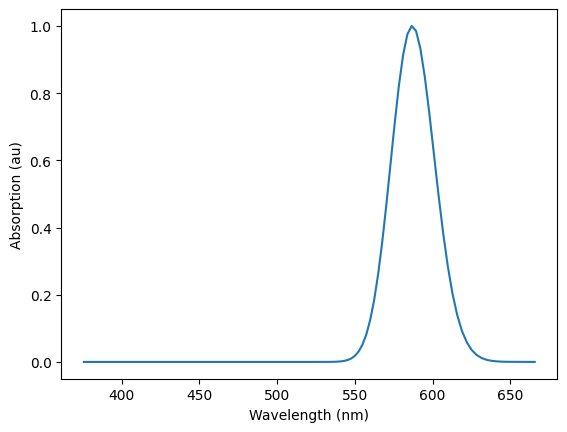

In [ ]:
from pyscf import gto, scf, dft, tddft
from pyscf.solvent import ddcosmo
from pyscf import solvent

mol = gto.Mole()
mol.atom="opt.xyz"
# set basis set
mol.basis = "6-31+G(d,p)"
mol.build()

# set DFT functional
mf = dft.RKS(mol)
mf.xc = 'B3LYP'


# initialize the mf object in gas phase
#mf.kernel()

# initialize mf object in DMSO
#mf = mf.DDCOSMO()
#mf.with_solvent.eps = 35.688  # Acetonitrile
#mf = mf.run()
mf = solvent.ddCOSMO(mf)
mf.with_solvent.eps = 46.826  # DMSO
mf.with_solvent.verbose = 4
mf.kernel()

# setup the TDDFT
td = tddft.TDDFT(mf)

# set type and number of states required
td.singlet = True
td.nstates = 10

# run TDDFT
td.kernel()

# analyze to show a table of excitations
td.analyze()

# helper function to plot absorption spectrum
def plot_absorption(td_obj, step=0.01, sigma=0.05):
    import scipy.constants as cst
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt

    # get transitions can convert to eV
    transitions =  td_obj.e * 27.2114

    # get oscilator strengths
    f = td_obj.oscillator_strength()

    # get minimum and miximum x-values for plot
    minval = min([val for val in transitions]) - 5.0 * sigma
    #maxval = max([val for val in transitions]) + 5.0 * sigma
    maxval = 3.3

    # number of data points in line
    npts = int((maxval - minval) / step) + 1

    # generating the plot
    eneval = np.linspace(minval, maxval, npts)  # in eV
    lambdaval = [cst.h * cst.c / (val * cst.e) * 1.e9
                 for val in eneval]  # in nm

    # sum of gaussian functions
    spectra = np.zeros(npts)
    for i in range(len(transitions)):
     spectra += f[i] * norm.pdf(eneval, transitions[i], sigma)
    spectra /= spectra.max()

    # plot the spectrum
    plt.plot(lambdaval,spectra)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorption (au)")

    # Find max absorption
    max_idx = np.argmax(spectra)
    max_wavelength = lambdaval[max_idx]
    max_intensity = spectra[max_idx]
    print(f"Maximum absorption at {max_wavelength:.2f} nm with intensity {max_intensity:.3f} au")

# plot the absorption from td
plot_absorption(td)


We now have a spectrum whcih shows the stroingest transitions (or absorbtion lines) and the wavelength of the light corresponding to the maximum absorbtion. We can use this wavelength now to calculate the complemeatery wavelength, which will define the color our molecule apears to our eyes. In order to do so, we need to give the variable "walwngth_nm" the corresponding value.

In [ ]:
import colorsys
import numpy as np

wavelength_nm=

def wavelength_to_rgb(wavelength_nm, gamma=0.8):
    if wavelength_nm < 380 or wavelength_nm > 780:
        return (0, 0, 0)

    if wavelength_nm < 440:
        R = -(wavelength_nm - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength_nm < 490:
        R = 0.0
        G = (wavelength_nm - 440) / (490 - 440)
        B = 1.0
    elif wavelength_nm < 510:
        R = 0.0
        G = 1.0
        B = -(wavelength_nm - 510) / (510 - 490)
    elif wavelength_nm < 580:
        R = (wavelength_nm - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength_nm < 645:
        R = 1.0
        G = -(wavelength_nm - 645) / (645 - 580)
        B = 0.0
    else:
        R = 1.0
        G = 0.0
        B = 0.0

    if wavelength_nm < 420:
        factor = 0.3 + 0.7 * (wavelength_nm - 380) / (420 - 380)
    elif wavelength_nm <= 700:
        factor = 1.0
    else:
        factor = 0.3 + 0.7 * (780 - wavelength_nm) / (780 - 700)

    def adjust(c):
        if c == 0.0:
            return 0
        return int(round(255 * ((c * factor) ** gamma)))

    return (adjust(R), adjust(G), adjust(B))


def rgb_to_hsv_normalized(r, g, b):
    return colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)

def hsv_to_rgb_int(h, s, v):
    r, g, b = colorsys.hsv_to_rgb(h, s, v)
    return int(r * 255), int(g * 255), int(b * 255)

def find_closest_wavelength(target_rgb):
    min_dist = float('inf')
    best_wavelength = None
    for wl in range(380, 781):
        rgb = wavelength_to_rgb(wl)
        dist = np.linalg.norm(np.array(rgb) - np.array(target_rgb))
        if dist < min_dist:
            min_dist = dist
            best_wavelength = wl
    return best_wavelength

def complementary_wavelength(wavelength_nm):
    base_rgb = wavelength_to_rgb(wavelength_nm)
    hsv = rgb_to_hsv_normalized(*base_rgb)
    comp_hue = (hsv[0] + 0.5) % 1.0  # 180 degrees shift
    comp_rgb = hsv_to_rgb_int(comp_hue, hsv[1], hsv[2])
    comp_wavelength = find_closest_wavelength(comp_rgb)
    return {
        "input_wavelength": wavelength_nm,
        "input_rgb": base_rgb,
        "complementary_rgb": comp_rgb,
        "approx_complementary_wavelength": comp_wavelength
    }
result = complementary_wavelength(wavelength_nm)
print(result)

{'input_wavelength': 515, 'input_rgb': (31, 255, 0), 'complementary_rgb': (224, 0, 255), 'approx_complementary_wavelength': 410}


Now let's visualize it

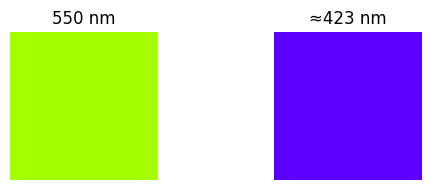

{'input_wavelength': 550, 'input_rgb': (163, 255, 0), 'complementary_rgb': (91, 0, 255), 'approx_complementary_wavelength': 423}


In [ ]:
import colorsys
import numpy as np

wavelength_nm=550


def wavelength_to_rgb(wavelength_nm, gamma=0.8):
    if wavelength_nm < 380 or wavelength_nm > 780:
        return (0, 0, 0)

    if wavelength_nm < 440:
        R = -(wavelength_nm - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength_nm < 490:
        R = 0.0
        G = (wavelength_nm - 440) / (490 - 440)
        B = 1.0
    elif wavelength_nm < 510:
        R = 0.0
        G = 1.0
        B = -(wavelength_nm - 510) / (510 - 490)
    elif wavelength_nm < 580:
        R = (wavelength_nm - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength_nm < 645:
        R = 1.0
        G = -(wavelength_nm - 645) / (645 - 580)
        B = 0.0
    else:
        R = 1.0
        G = 0.0
        B = 0.0

    if wavelength_nm < 420:
        factor = 0.3 + 0.7 * (wavelength_nm - 380) / (420 - 380)
    elif wavelength_nm <= 700:
        factor = 1.0
    else:
        factor = 0.3 + 0.7 * (780 - wavelength_nm) / (780 - 700)

    def adjust(c):
        if c == 0.0:
            return 0
        return int(round(255 * ((c * factor) ** gamma)))

    return (adjust(R), adjust(G), adjust(B))


def rgb_to_hsv_normalized(r, g, b):
    return colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)

def hsv_to_rgb_int(h, s, v):
    r, g, b = colorsys.hsv_to_rgb(h, s, v)
    return int(r * 255), int(g * 255), int(b * 255)

def find_closest_wavelength(target_rgb):
    min_dist = float('inf')
    best_wavelength = None
    for wl in range(380, 781):
        rgb = wavelength_to_rgb(wl)
        dist = np.linalg.norm(np.array(rgb) - np.array(target_rgb))
        if dist < min_dist:
            min_dist = dist
            best_wavelength = wl
    return best_wavelength

def complementary_wavelength(wavelength_nm):
    base_rgb = wavelength_to_rgb(wavelength_nm)
    hsv = rgb_to_hsv_normalized(*base_rgb)
    comp_hue = (hsv[0] + 0.5) % 1.0  # 180 degrees shift
    comp_rgb = hsv_to_rgb_int(comp_hue, hsv[1], hsv[2])
    comp_wavelength = find_closest_wavelength(comp_rgb)
    # Plotting the original and complementary color
    fig, ax = plt.subplots(1, 2, figsize=(6, 2))
    ax[0].imshow([[np.array(base_rgb)/255]])
    ax[0].set_title(f"{wavelength_nm} nm")
    ax[0].axis("off")

    ax[1].imshow([[np.array(comp_rgb)/255]])
    ax[1].set_title(f"≈{comp_wavelength} nm")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()
    return {
        "input_wavelength": wavelength_nm,
        "input_rgb": base_rgb,
        "complementary_rgb": comp_rgb,
        "approx_complementary_wavelength": comp_wavelength
    }
result = complementary_wavelength(wavelength_nm)
print(result)